<a href="https://colab.research.google.com/github/travisngt/ML_Breast_Cancer_Final_Project/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- KNN ---
Accuracy: 81.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.82      0.85        38
      Benign       0.78      0.89      0.83        28
   Malignant       0.76      0.74      0.75        34

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



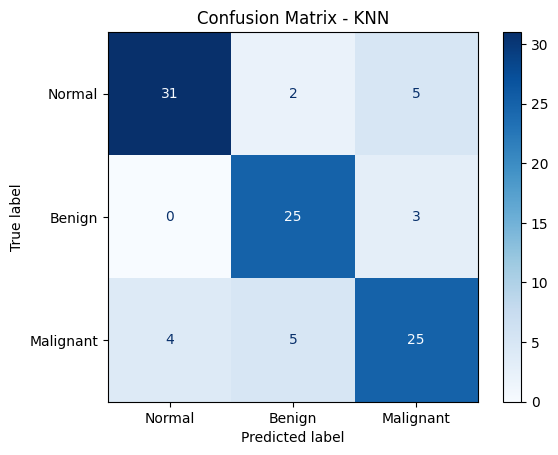

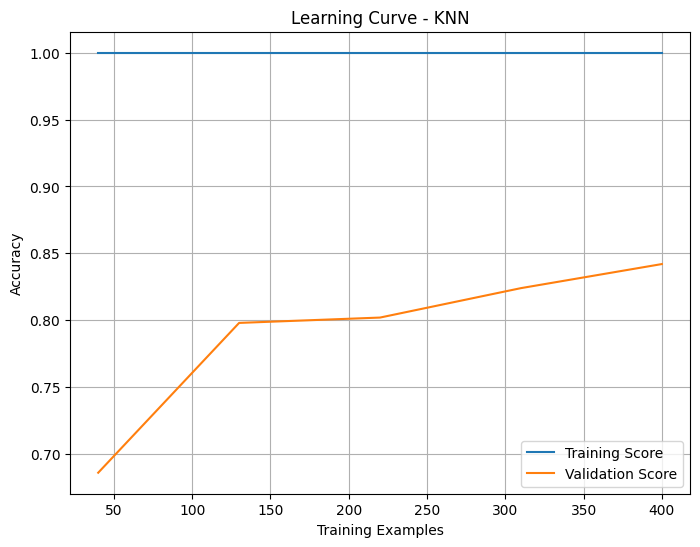

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression ---
Accuracy: 68.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.73      0.71      0.72        38
      Benign       0.72      0.75      0.74        28
   Malignant       0.59      0.59      0.59        34

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



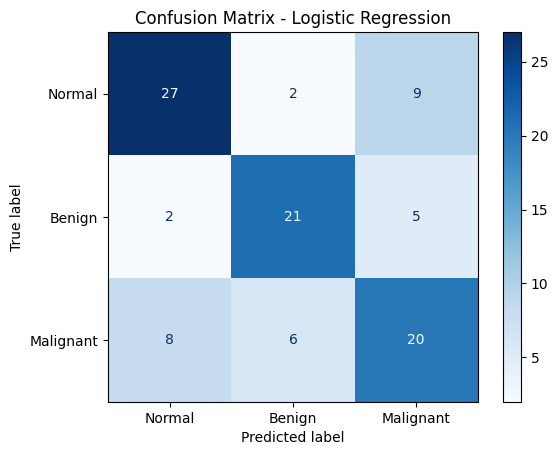

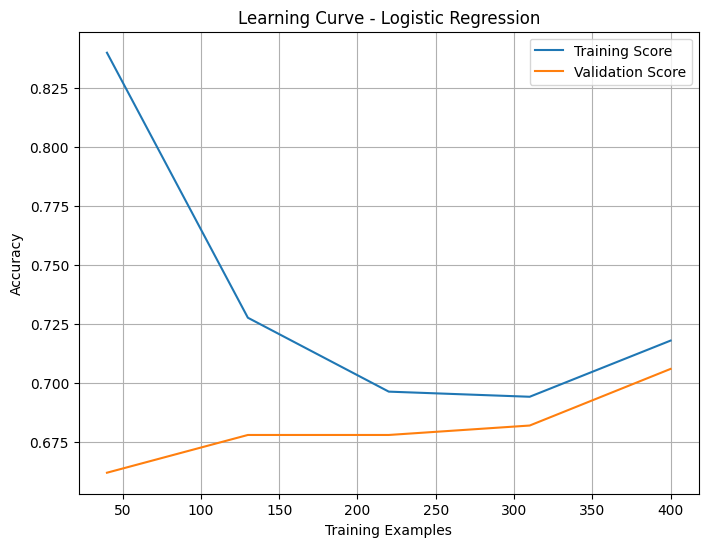

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM ---
Accuracy: 85.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.82      0.85        38
      Benign       0.82      1.00      0.90        28
   Malignant       0.84      0.76      0.80        34

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.85      0.85      0.85       100



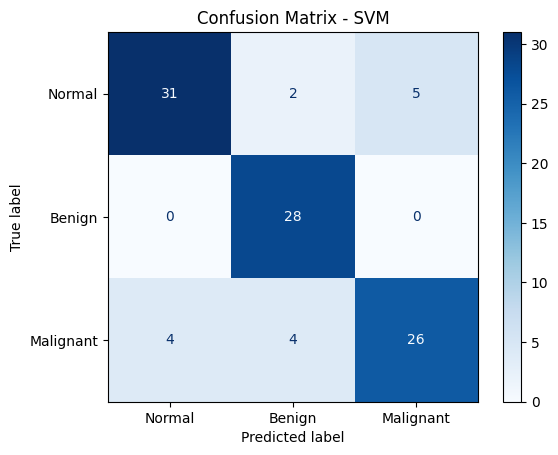

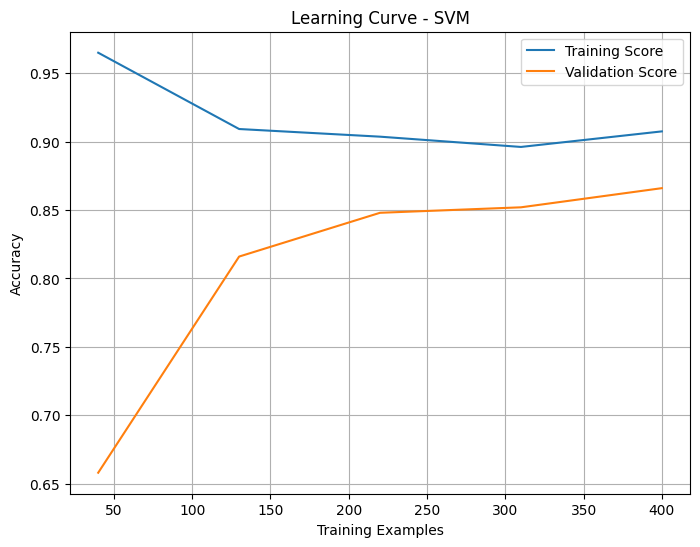

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest ---
Accuracy: 86.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.89      0.87      0.88        38
      Benign       0.78      1.00      0.88        28
   Malignant       0.93      0.74      0.82        34

    accuracy                           0.86       100
   macro avg       0.87      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



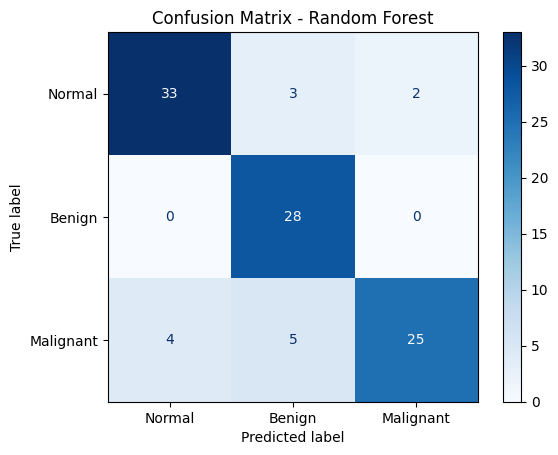

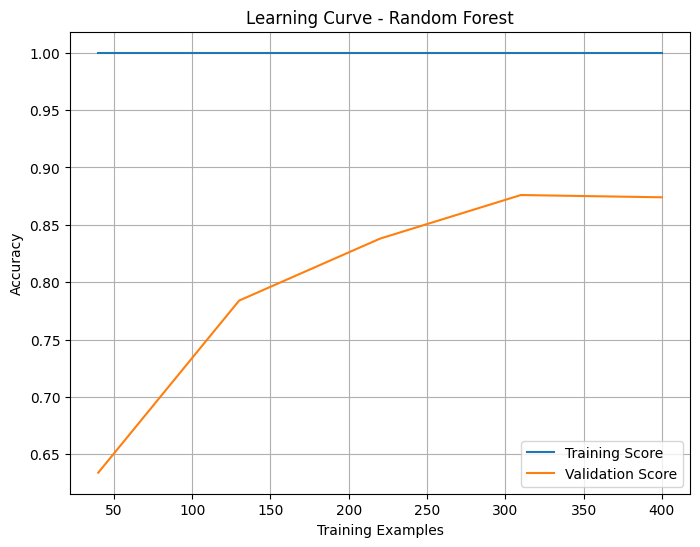

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load synthetic dataset
file_path = '/content/drive/My Drive/8featuresdata/synthetic_knn_dataset.xlsx'
data = pd.read_excel(file_path)

# Preprocessing
non_numeric_cols = data.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    data = data.drop(columns=non_numeric_cols)

# Features and labels
X = data.drop(columns=['Label']).values  # Features
y = data['Label'].values  # Labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Function to evaluate and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Benign', 'Malignant']))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Benign', 'Malignant'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# KNN
knn_params = {'n_neighbors': range(1, min(11, len(X_train) + 1))}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
evaluate_model(best_knn, X_test, y_test, "KNN")
plot_learning_curve(best_knn, "KNN", X_scaled, y)

# Logistic Regression
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
evaluate_model(best_log_reg, X_test, y_test, "Logistic Regression")
plot_learning_curve(best_log_reg, "Logistic Regression", X_scaled, y)

# SVM
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
evaluate_model(best_svm, X_test, y_test, "SVM")
plot_learning_curve(best_svm, "SVM", X_scaled, y)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
evaluate_model(best_rf, X_test, y_test, "Random Forest")
plot_learning_curve(best_rf, "Random Forest", X_scaled, y)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression ---
Accuracy: 54.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56        47
           1       0.48      0.58      0.53        36

    accuracy                           0.54        83
   macro avg       0.55      0.55      0.54        83
weighted avg       0.56      0.54      0.54        83



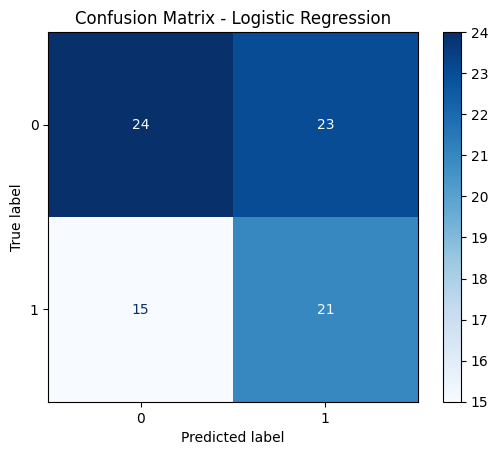

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

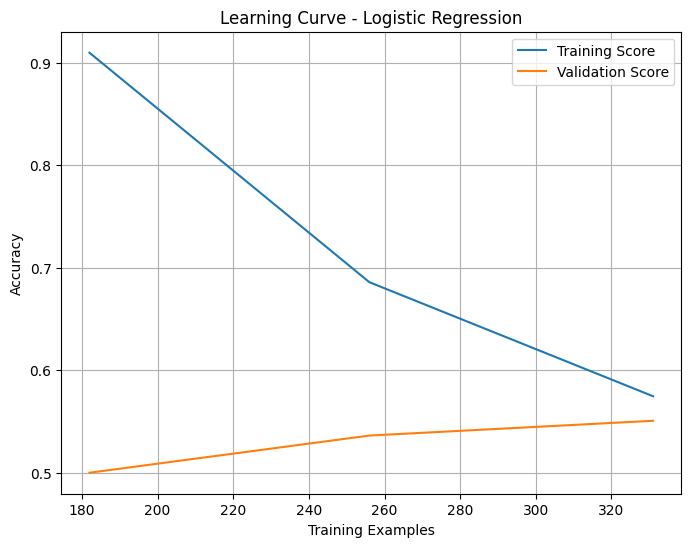

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest ---
Accuracy: 93.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.86      0.93        36

    accuracy                           0.94        83
   macro avg       0.95      0.93      0.94        83
weighted avg       0.95      0.94      0.94        83



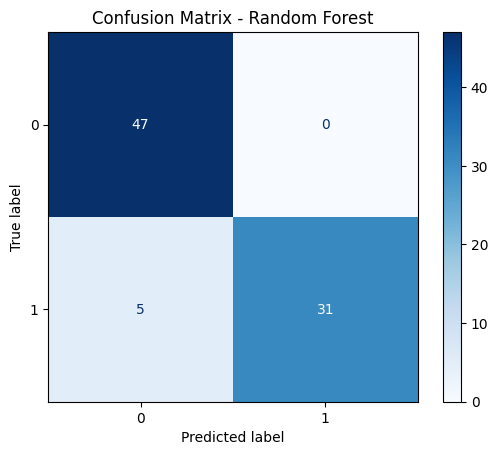

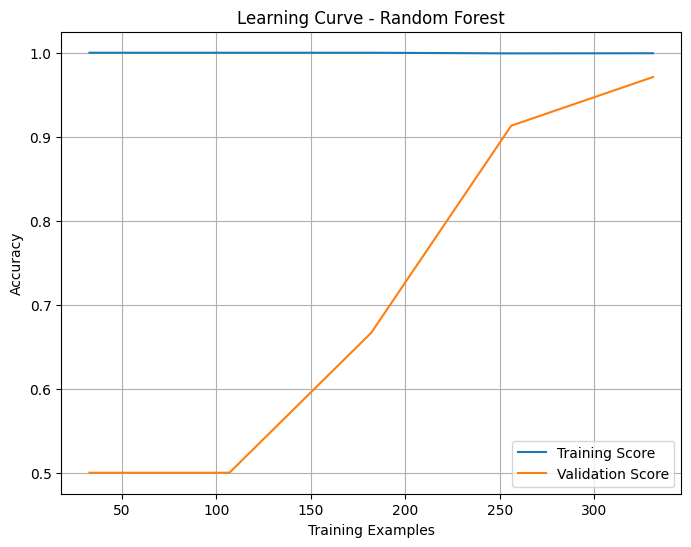


--- KNN ---
Accuracy: 96.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.92      0.96        36

    accuracy                           0.96        83
   macro avg       0.97      0.96      0.96        83
weighted avg       0.97      0.96      0.96        83



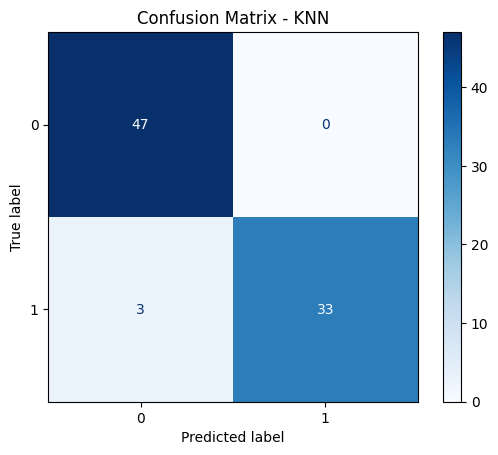

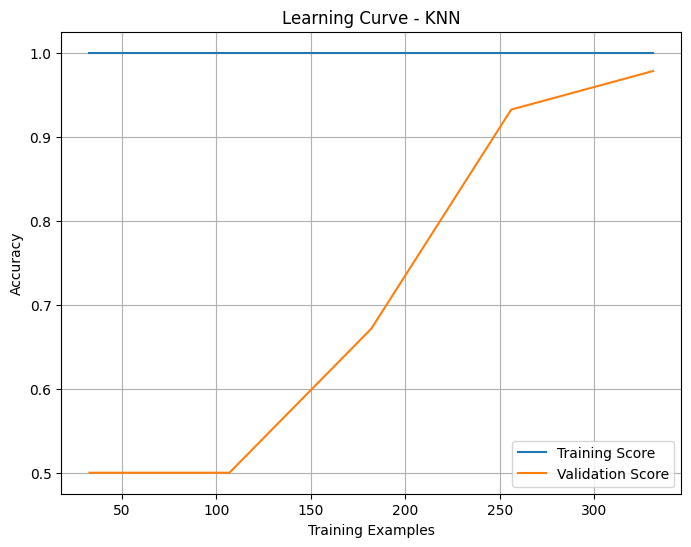

In [ ]:
# Re-import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset using the correct path variable
final_path = '/content/drive/My Drive/8featuresdata/final_combined_dataset_cleaned.csv'
annotations_file_path = '/content/drive/My Drive/breast_cancer_annotations/breast_cancer_annotations (1).csv'
annotations = pd.read_csv(annotations_file_path)
data_fixed = pd.read_csv(final_path)




# Ensure the dataset is properly encoded
data_fixed['Label'] = data_fixed['Label'].astype('category').cat.codes

# Split features and labels
X_fixed = data_fixed.drop(columns=['Label']).values  # Features
y_fixed = data_fixed['Label'].values  # Labels

# Standardize features
scaler_fixed = StandardScaler()
X_scaled_fixed = scaler_fixed.fit_transform(X_fixed)

# Split data into training and testing sets
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_scaled_fixed, y_fixed, test_size=0.2, random_state=42
)

# Update and rerun the KNN model as a test case
knn_params_fixed = {'n_neighbors': range(1, min(11, len(X_train_fixed) + 1))}
knn_grid_fixed = GridSearchCV(KNeighborsClassifier(), knn_params_fixed, cv=5, n_jobs=-1, verbose=1)
knn_grid_fixed.fit(X_train_fixed, y_train_fixed)
best_knn_fixed = knn_grid_fixed.best_estimator_
# Logistic Regression
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train_fixed, y_train_fixed)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate the Logistic Regression model
evaluate_model(best_log_reg, X_test_fixed, y_test_fixed, "Logistic Regression")
plot_learning_curve(best_log_reg, "Logistic Regression", X_scaled_fixed, y_fixed)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_fixed, y_train_fixed)
best_rf = rf_grid.best_estimator_

# Evaluate the Random Forest model
evaluate_model(best_rf, X_test_fixed, y_test_fixed, "Random Forest")
plot_learning_curve(best_rf, "Random Forest", X_scaled_fixed, y_fixed)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Evaluate the KNN model
evaluate_model(best_knn_fixed, X_test_fixed, y_test_fixed, "KNN")

# Plot the learning curve for the fixed model
plot_learning_curve(best_knn_fixed, "KNN", X_scaled_fixed, y_fixed)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- KNN with Annotations ---
Accuracy: 81.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.82      0.75      0.78        36

    accuracy                           0.82        83
   macro avg       0.82      0.81      0.81        83
weighted avg       0.82      0.82      0.82        83



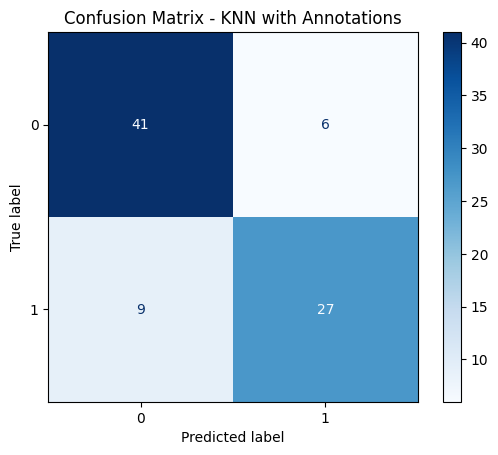

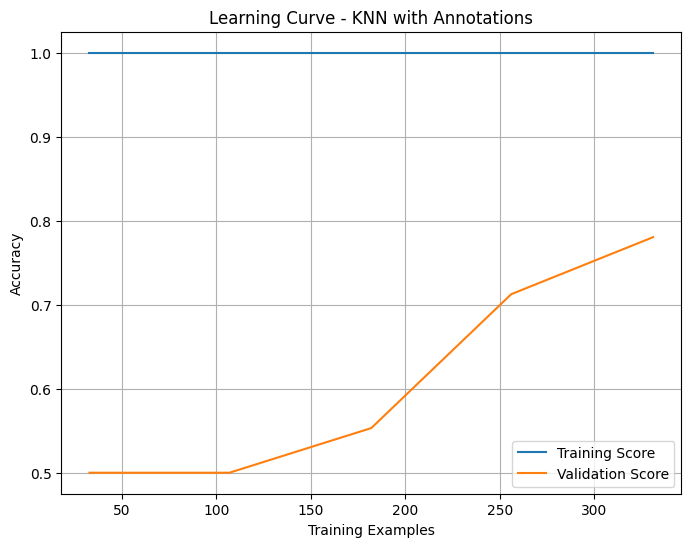

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression with Annotations ---
Accuracy: 75.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.75      0.67      0.71        36

    accuracy                           0.76        83
   macro avg       0.76      0.75      0.75        83
weighted avg       0.76      0.76      0.76        83



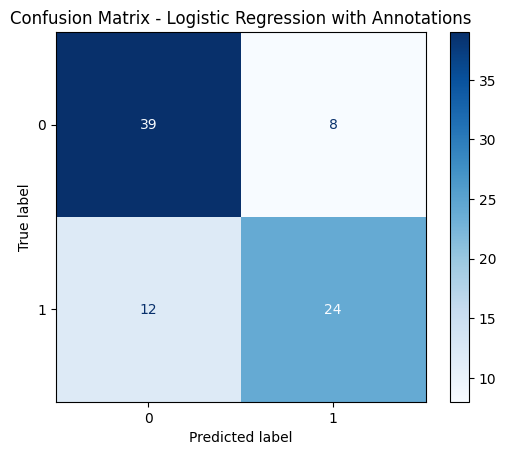

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

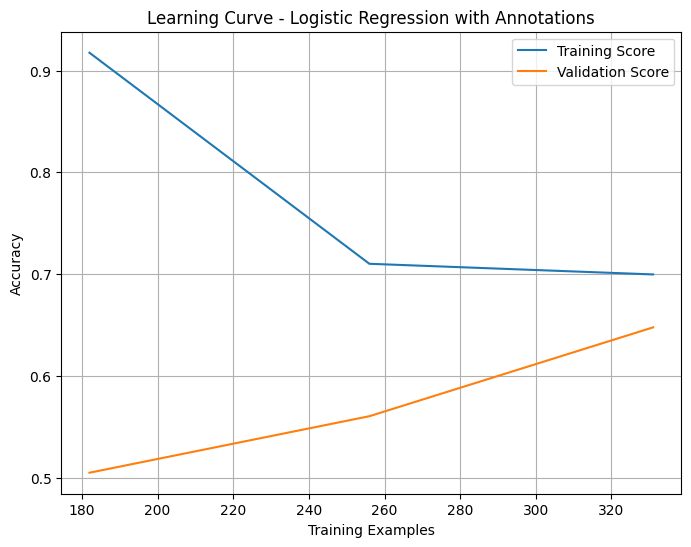

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest with Annotations ---
Accuracy: 93.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.86      0.93        36

    accuracy                           0.94        83
   macro avg       0.95      0.93      0.94        83
weighted avg       0.95      0.94      0.94        83



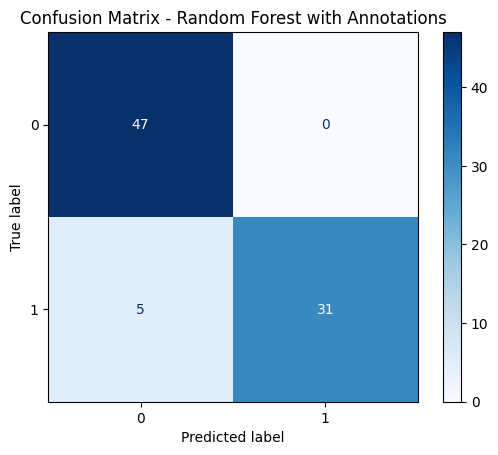

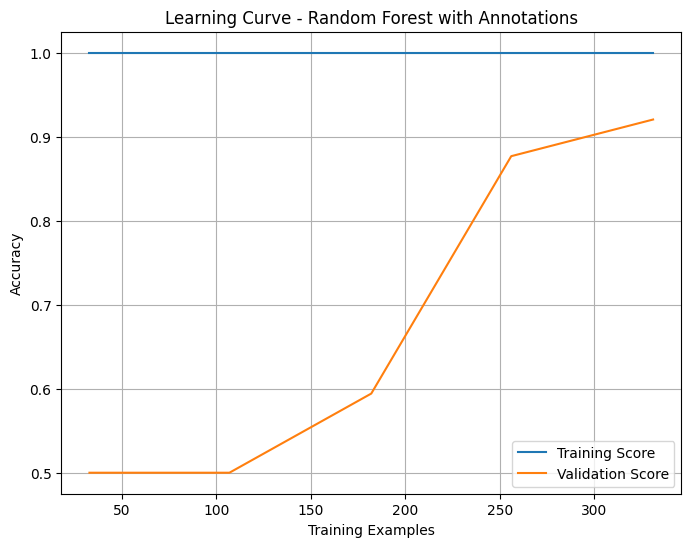

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM with Annotations ---
Accuracy: 79.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.81      0.69      0.75        36

    accuracy                           0.80        83
   macro avg       0.80      0.78      0.79        83
weighted avg       0.80      0.80      0.79        83



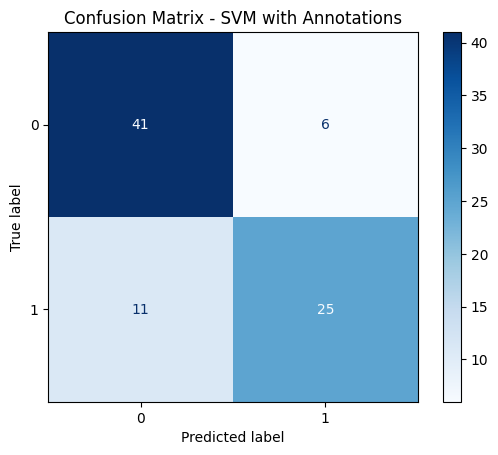

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

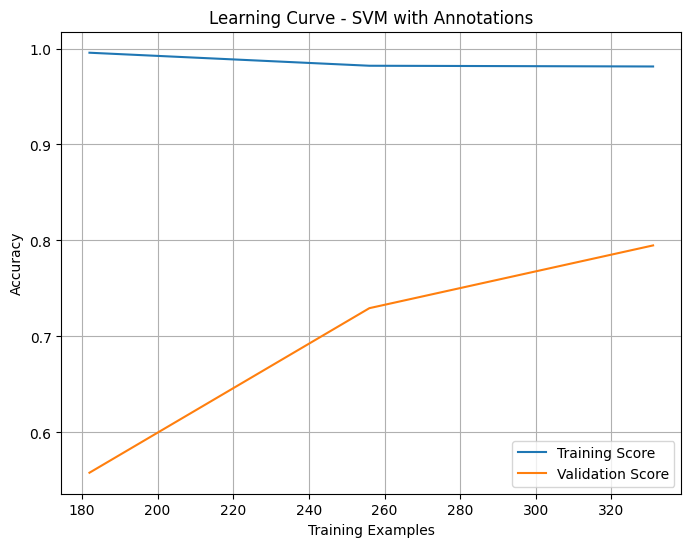

In [ ]:
# Re-import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load datasets
final_path = '/content/drive/My Drive/8featuresdata/final_combined_dataset_cleaned.csv'
annotations_file_path = '/content/drive/My Drive/breast_cancer_annotations/breast_cancer_annotations (1).csv'
data_cleaned = pd.read_csv(final_path)
annotations = pd.read_csv(annotations_file_path)

# Merge annotations with the cleaned dataset
data_combined = pd.concat([data_cleaned, annotations[['Density', 'X_Center', 'Y_Center', 'Radius']]], axis=1)

# Encode 'Label' and 'Density' as numeric
data_combined['Label'] = data_combined['Label'].astype('category').cat.codes
data_combined['Density'] = data_combined['Density'].astype('category').cat.codes

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_combined = data_combined.drop(columns=['Label']).values  # Features
X_imputed = imputer.fit_transform(X_combined)
y_combined = data_combined['Label'].values  # Labels

# Standardize features
scaler_combined = StandardScaler()
X_scaled_combined = scaler_combined.fit_transform(X_imputed)

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_scaled_combined, y_combined, test_size=0.2, random_state=42
)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# KNN Model
knn_params_combined = {'n_neighbors': range(1, 11)}
knn_grid_combined = GridSearchCV(KNeighborsClassifier(), knn_params_combined, cv=5, n_jobs=-1, verbose=1)
knn_grid_combined.fit(X_train_combined, y_train_combined)
best_knn_combined = knn_grid_combined.best_estimator_

# Evaluate KNN
evaluate_model(best_knn_combined, X_test_combined, y_test_combined, "KNN with Annotations")
plot_learning_curve(best_knn_combined, "KNN with Annotations", X_scaled_combined, y_combined)

# Logistic Regression
log_reg_params_combined = {'C': [0.1, 1, 10, 100]}
log_reg_grid_combined = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params_combined, cv=5, n_jobs=-1, verbose=1)
log_reg_grid_combined.fit(X_train_combined, y_train_combined)
best_log_reg_combined = log_reg_grid_combined.best_estimator_

# Evaluate Logistic Regression
evaluate_model(best_log_reg_combined, X_test_combined, y_test_combined, "Logistic Regression with Annotations")
plot_learning_curve(best_log_reg_combined, "Logistic Regression with Annotations", X_scaled_combined, y_combined)

# Random Forest
rf_params_combined = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_combined = GridSearchCV(RandomForestClassifier(), rf_params_combined, cv=5, n_jobs=-1, verbose=1)
rf_grid_combined.fit(X_train_combined, y_train_combined)
best_rf_combined = rf_grid_combined.best_estimator_

# Evaluate Random Forest
evaluate_model(best_rf_combined, X_test_combined, y_test_combined, "Random Forest with Annotations")
plot_learning_curve(best_rf_combined, "Random Forest with Annotations", X_scaled_combined, y_combined)

# Ensure 'Label' is an integer
y_combined = data_combined['Label'].astype(int).values  # Labels as integers

# Split data
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_scaled_combined, y_combined, test_size=0.2, random_state=42
)

# Train and evaluate SVM
from sklearn.svm import SVC

svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_combined, y_train_combined)

best_svm = svm_grid.best_estimator_
evaluate_model(best_svm, X_test_combined, y_test_combined, "SVM with Annotations")
plot_learning_curve(best_svm, "SVM with Annotations", X_scaled_combined, y_combined)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



--- KNN Model ---
Accuracy: 79.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.77      0.75      0.76        36

    accuracy                           0.80        83
   macro avg       0.79      0.79      0.79        83
weighted avg       0.79      0.80      0.79        83



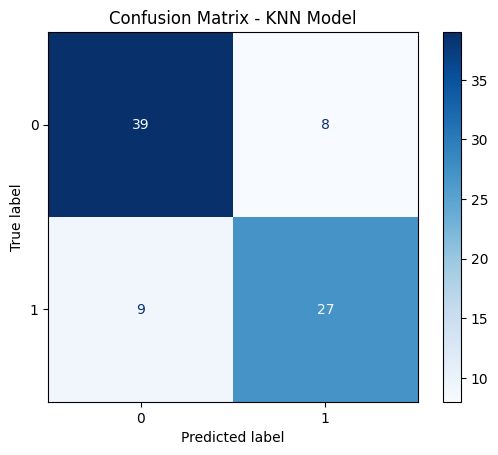

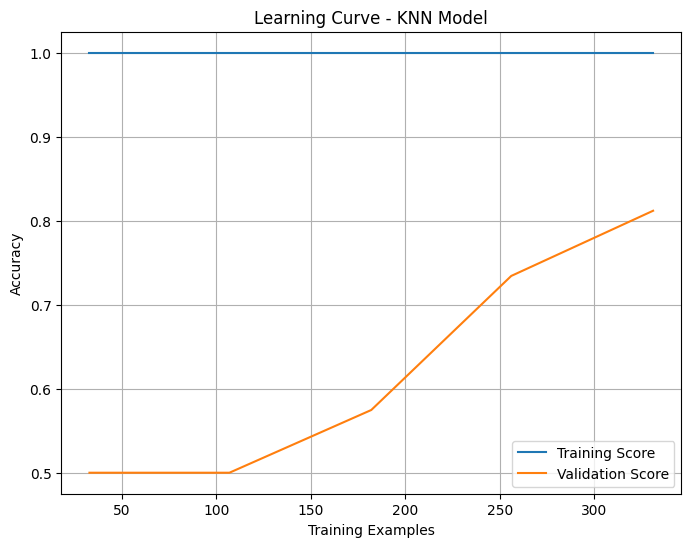

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression Model ---
Accuracy: 77.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        47
           1       0.77      0.67      0.72        36

    accuracy                           0.77        83
   macro avg       0.77      0.76      0.76        83
weighted avg       0.77      0.77      0.77        83



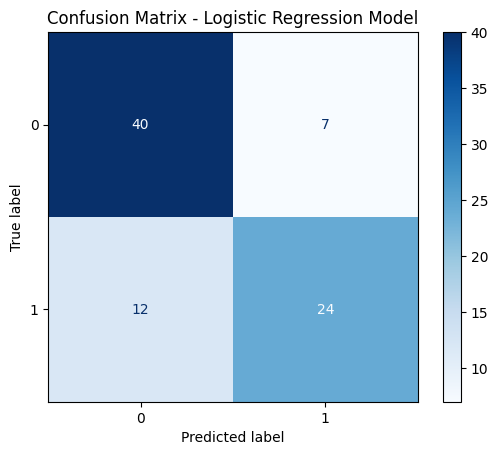

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

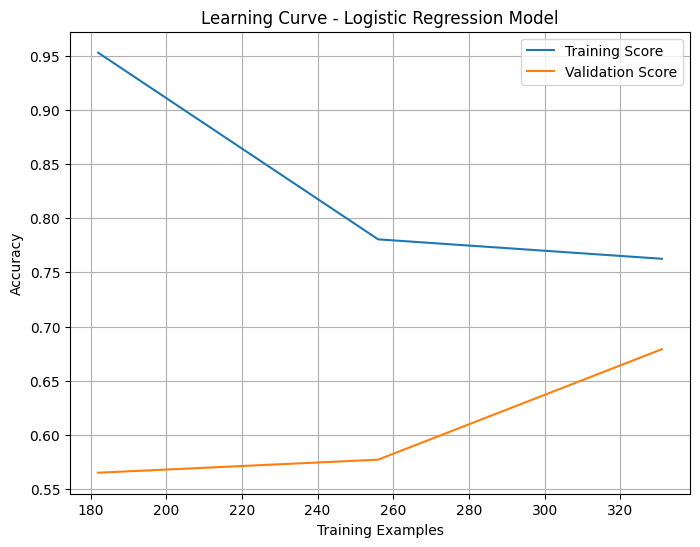

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest Model ---
Accuracy: 92.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.97      0.86      0.91        36

    accuracy                           0.93        83
   macro avg       0.94      0.92      0.93        83
weighted avg       0.93      0.93      0.93        83



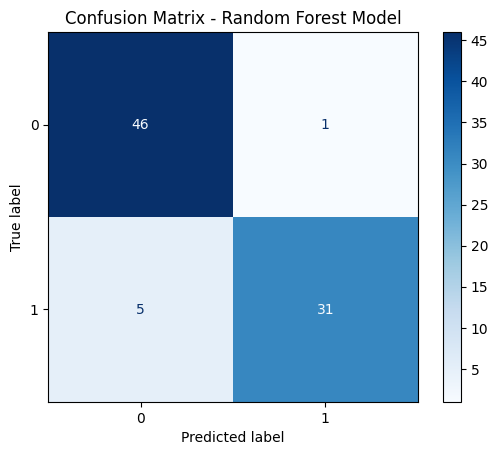

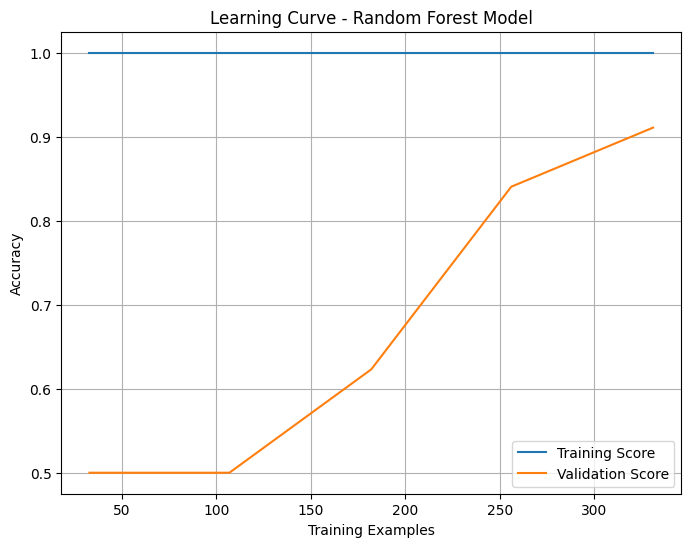

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM Model ---
Accuracy: 83.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        47
           1       0.87      0.72      0.79        36

    accuracy                           0.83        83
   macro avg       0.84      0.82      0.82        83
weighted avg       0.84      0.83      0.83        83



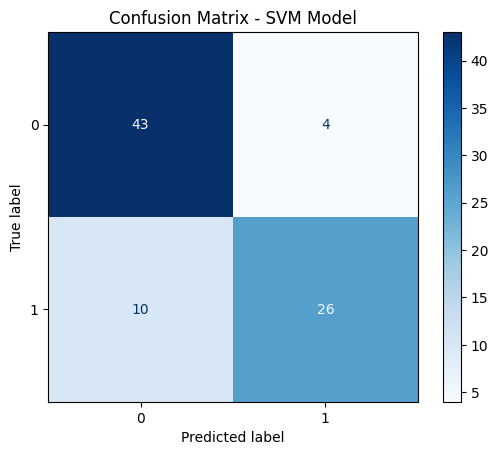

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

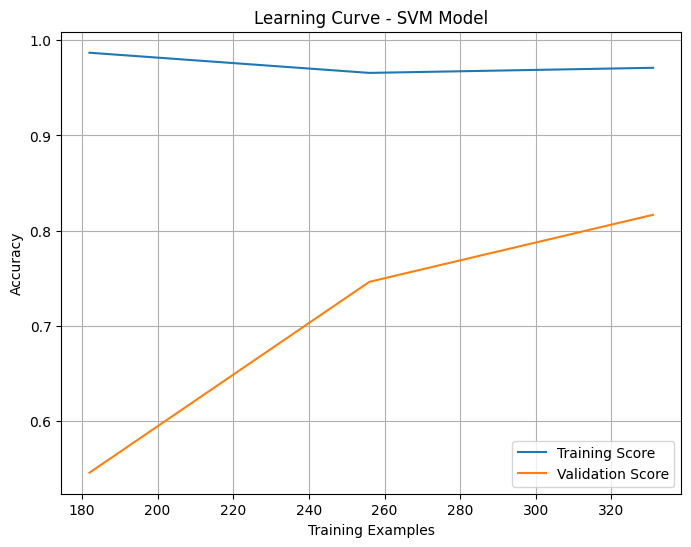

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
final_path = '/content/drive/My Drive/8featuresdata/final_combined_dataset_cleaned.csv'
annotations_path = '/content/drive/My Drive/breast_cancer_annotations/breast_cancer_annotations.csv'
data_cleaned = pd.read_csv(final_path)
annotations = pd.read_csv(annotations_path)

# Merge datasets
data_combined = pd.concat([data_cleaned, annotations[['Density', 'Lesion_Type', 'X_Center', 'Y_Center', 'Radius']]], axis=1)

# Encode categorical variables
data_combined['Label'] = data_combined['Label'].astype('category').cat.codes  # Encode target labels
data_combined['Density'] = data_combined['Density'].astype('category').cat.codes  # Encode Density
data_combined = pd.get_dummies(data_combined, columns=['Lesion_Type'], drop_first=True)  # One-hot encode Lesion_Type

# Handle missing values
X_combined = data_combined.drop(columns=['Label']).values  # Features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_combined)
y_combined = data_combined['Label'].values  # Labels

# Standardize features
scaler_combined = StandardScaler()
X_scaled_combined = scaler_combined.fit_transform(X_imputed)

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_scaled_combined, y_combined, test_size=0.2, random_state=42
)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Train KNN Model
knn_params_combined = {'n_neighbors': range(1, 11)}
knn_grid_combined = GridSearchCV(KNeighborsClassifier(), knn_params_combined, cv=5, n_jobs=-1, verbose=1)
knn_grid_combined.fit(X_train_combined, y_train_combined)
best_knn_combined = knn_grid_combined.best_estimator_

# Evaluate KNN
evaluate_model(best_knn_combined, X_test_combined, y_test_combined, "KNN Model")
plot_learning_curve(best_knn_combined, "KNN Model", X_scaled_combined, y_combined)

# Train Logistic Regression
log_reg_params_combined = {'C': [0.1, 1, 10, 100]}
log_reg_grid_combined = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params_combined, cv=5, n_jobs=-1, verbose=1)
log_reg_grid_combined.fit(X_train_combined, y_train_combined)
best_log_reg_combined = log_reg_grid_combined.best_estimator_

# Evaluate Logistic Regression
evaluate_model(best_log_reg_combined, X_test_combined, y_test_combined, "Logistic Regression Model")
plot_learning_curve(best_log_reg_combined, "Logistic Regression Model", X_scaled_combined, y_combined)

# Train Random Forest
rf_params_combined = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_combined = GridSearchCV(RandomForestClassifier(), rf_params_combined, cv=5, n_jobs=-1, verbose=1)
rf_grid_combined.fit(X_train_combined, y_train_combined)
best_rf_combined = rf_grid_combined.best_estimator_

# Evaluate Random Forest
evaluate_model(best_rf_combined, X_test_combined, y_test_combined, "Random Forest Model")
plot_learning_curve(best_rf_combined, "Random Forest Model", X_scaled_combined, y_combined)

# Train and evaluate SVM
from sklearn.svm import SVC
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_combined, y_train_combined)

best_svm = svm_grid.best_estimator_
evaluate_model(best_svm, X_test_combined, y_test_combined, "SVM Model")
plot_learning_curve(best_svm, "SVM Model", X_scaled_combined, y_combined)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [11 13 15 19 21 23]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



--- KNN Model ---
Accuracy: 89.16%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.86      0.89      0.88        36

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83



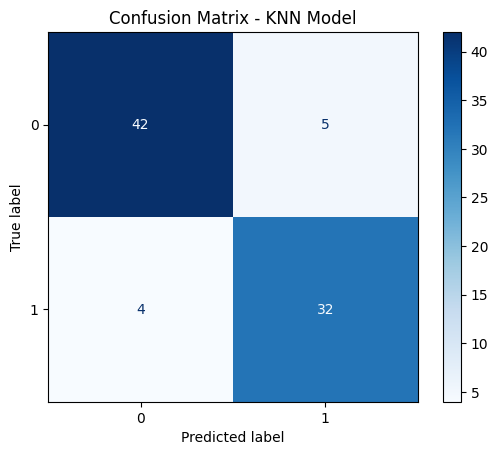

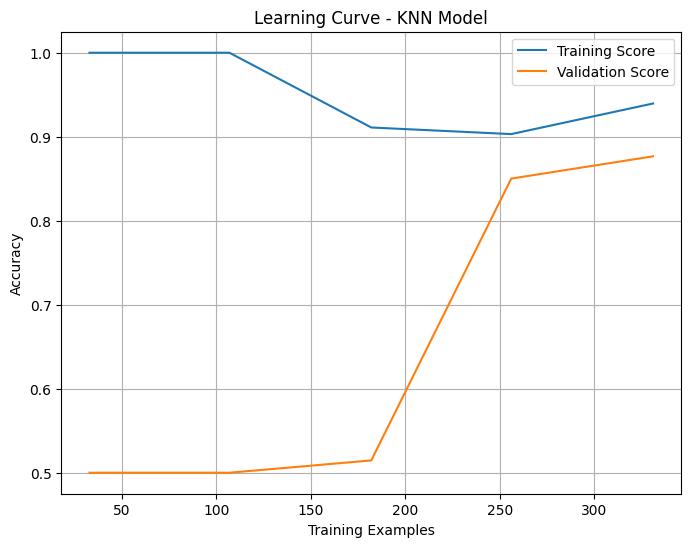

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression Model ---
Accuracy: 98.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.99        36

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



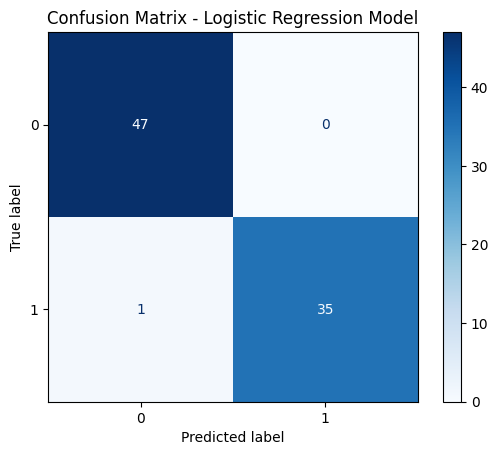

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

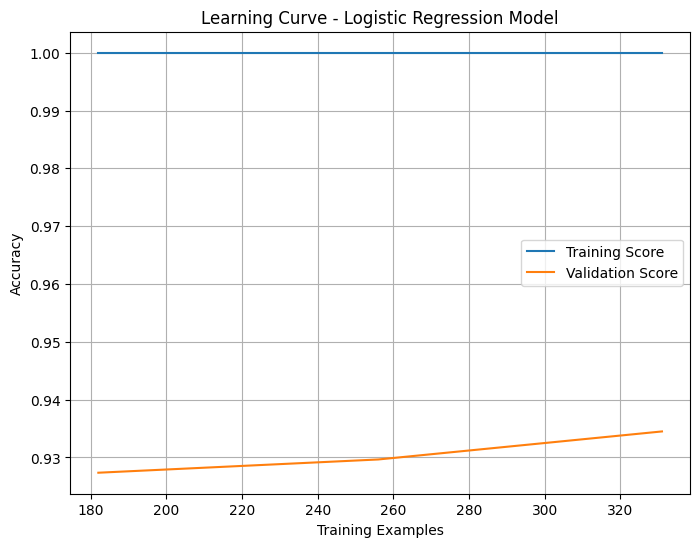

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest Model ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        36

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



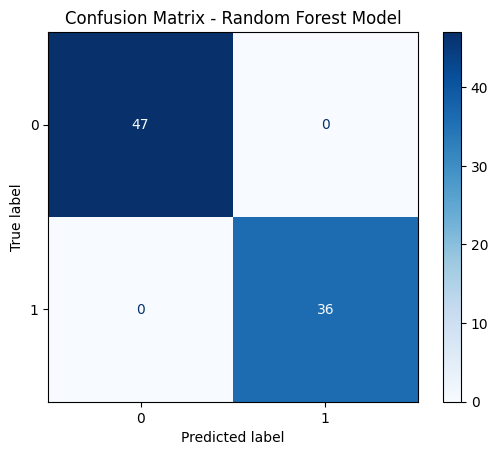

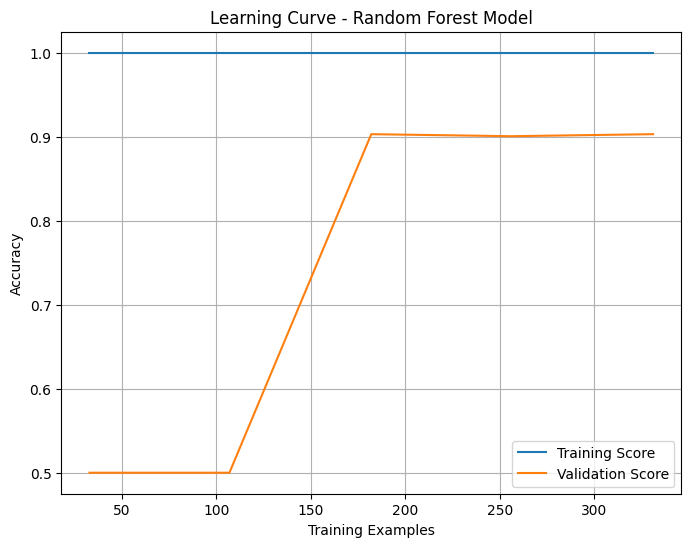

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM Model ---
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        36

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



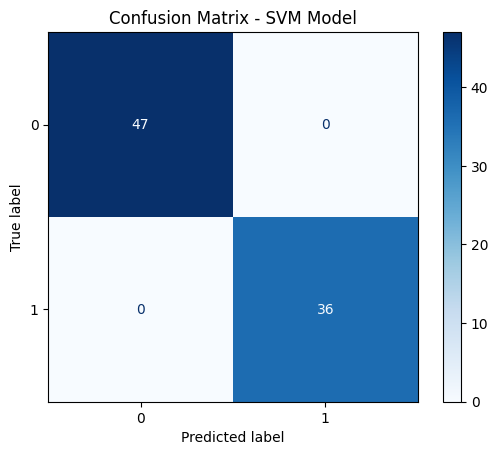

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

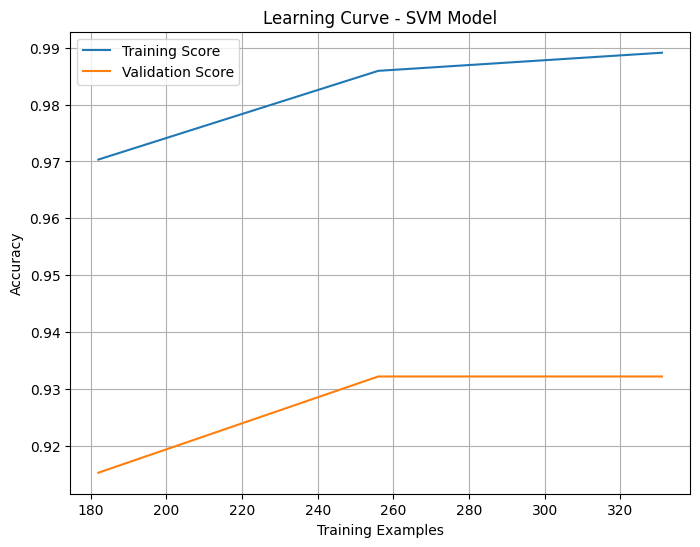

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load datasets
final_path = '/content/drive/My Drive/8featuresdata/final_combined_data_ver2.csv'
annotations_path = '/content/drive/My Drive/breast_cancer_annotations/breast_cancer_annotations.csv'
data_cleaned = pd.read_csv(final_path)
annotations = pd.read_csv(annotations_path)

# Merge datasets
data_combined = pd.concat([data_cleaned, annotations[['Density', 'Lesion_Type', 'X_Center', 'Y_Center', 'Radius']]], axis=1)

# Encode categorical variables
data_combined['Label'] = pd.Categorical(data_combined['Label']).codes  # Encode target labels
data_combined['Density'] = pd.Categorical(data_combined['Density']).codes  # Encode Density
data_combined = pd.get_dummies(data_combined, columns=['Lesion_Type'], drop_first=True)  # One-hot encode Lesion_Type

# Separate numeric and non-numeric columns
numeric_columns = data_combined.select_dtypes(include=[np.number]).columns
non_numeric_columns = data_combined.select_dtypes(exclude=[np.number]).columns

# Impute only numeric data
X_combined_numeric = data_combined[numeric_columns].drop(columns=['Label']).values  # Drop target column for features
imputer = SimpleImputer(strategy='mean')
X_imputed_numeric = imputer.fit_transform(X_combined_numeric)

# Standardize features
scaler_combined = StandardScaler()
X_scaled_numeric = scaler_combined.fit_transform(X_imputed_numeric)

# Update target variable (Label)
y_combined = data_combined['Label'].values  # Labels

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_scaled_numeric, y_combined, test_size=0.2, random_state=42
)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Train KNN Model
knn_params_combined = {'n_neighbors': range(1, 11)}
knn_grid_combined = GridSearchCV(KNeighborsClassifier(), knn_params_combined, cv=5, n_jobs=-1, verbose=1)
knn_grid_combined.fit(X_train_combined, y_train_combined)
best_knn_combined = knn_grid_combined.best_estimator_

# Evaluate KNN
evaluate_model(best_knn_combined, X_test_combined, y_test_combined, "KNN Model")
plot_learning_curve(best_knn_combined, "KNN Model", X_scaled_numeric, y_combined)

# Train Logistic Regression
log_reg_params_combined = {'C': [0.1, 1, 10, 100]}
log_reg_grid_combined = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params_combined, cv=5, n_jobs=-1, verbose=1)
log_reg_grid_combined.fit(X_train_combined, y_train_combined)
best_log_reg_combined = log_reg_grid_combined.best_estimator_

# Evaluate Logistic Regression
evaluate_model(best_log_reg_combined, X_test_combined, y_test_combined, "Logistic Regression Model")
plot_learning_curve(best_log_reg_combined, "Logistic Regression Model", X_scaled_numeric, y_combined)

# Train Random Forest
rf_params_combined = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_combined = GridSearchCV(RandomForestClassifier(), rf_params_combined, cv=5, n_jobs=-1, verbose=1)
rf_grid_combined.fit(X_train_combined, y_train_combined)
best_rf_combined = rf_grid_combined.best_estimator_

# Evaluate Random Forest
evaluate_model(best_rf_combined, X_test_combined, y_test_combined, "Random Forest Model")
plot_learning_curve(best_rf_combined, "Random Forest Model", X_scaled_numeric, y_combined)

# Train and evaluate SVM
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_combined, y_train_combined)

best_svm = svm_grid.best_estimator_
evaluate_model(best_svm, X_test_combined, y_test_combined, "SVM Model")
plot_learning_curve(best_svm, "SVM Model", X_scaled_numeric, y_combined)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [11 13 15 19 21 23]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



--- KNN Model ---
Accuracy: 91.57%
Loss: 8.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.89      0.95      0.92        41

    accuracy                           0.92        83
   macro avg       0.92      0.92      0.92        83
weighted avg       0.92      0.92      0.92        83



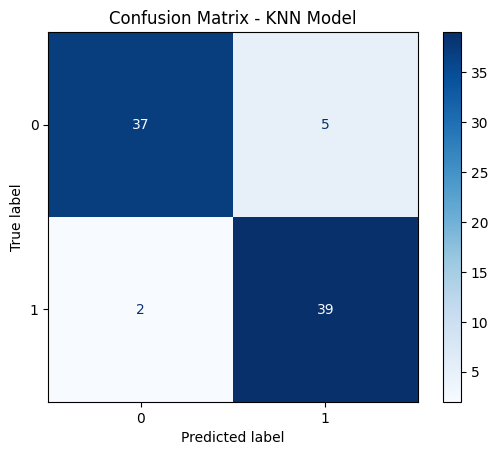

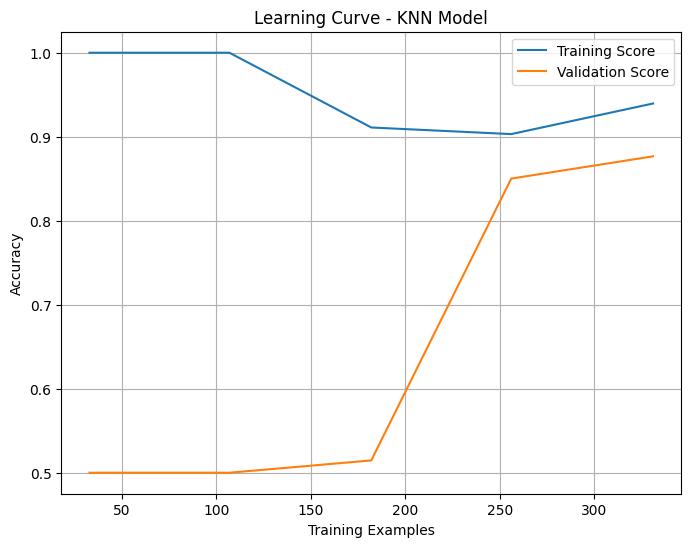

Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Logistic Regression Model ---
Accuracy: 98.80%
Loss: 1.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.98      0.99        41

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



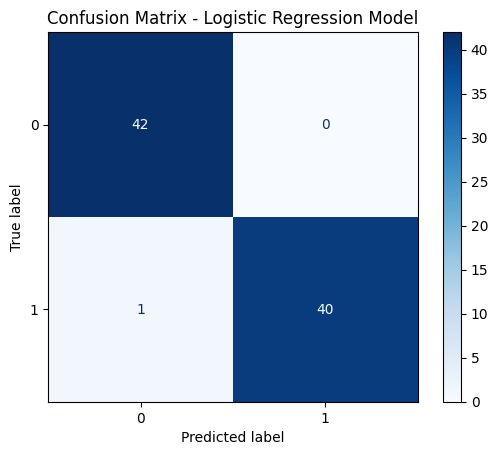

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

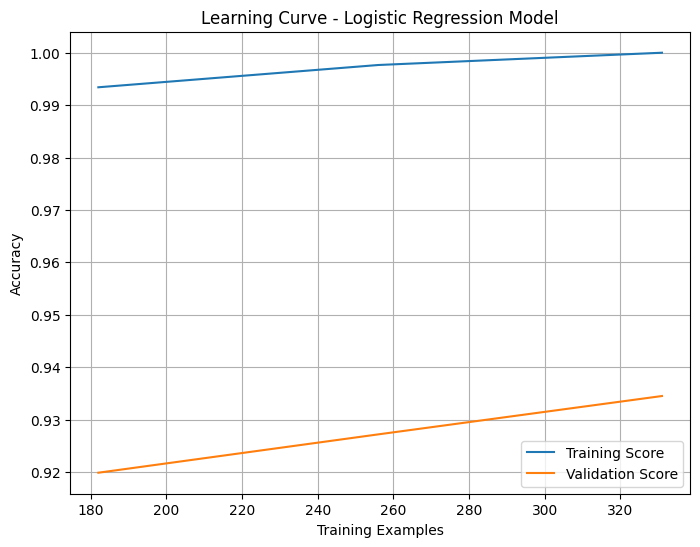

Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Random Forest Model ---
Accuracy: 100.00%
Loss: 0.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        41

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



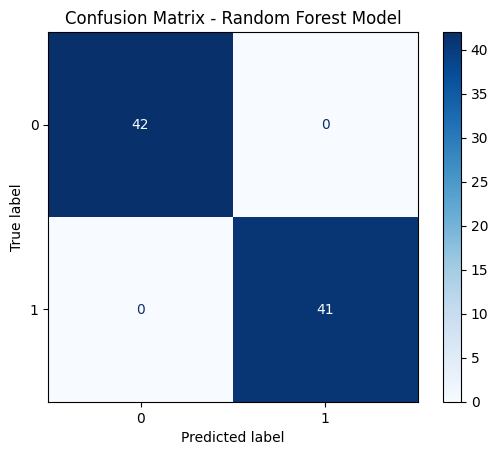

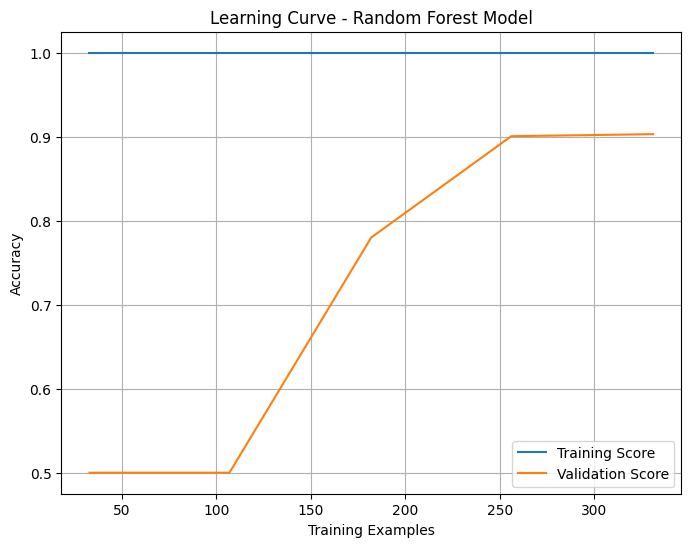

Fitting 5 folds for each of 16 candidates, totalling 80 fits

--- SVM Model ---
Accuracy: 97.59%
Loss: 2.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        41

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



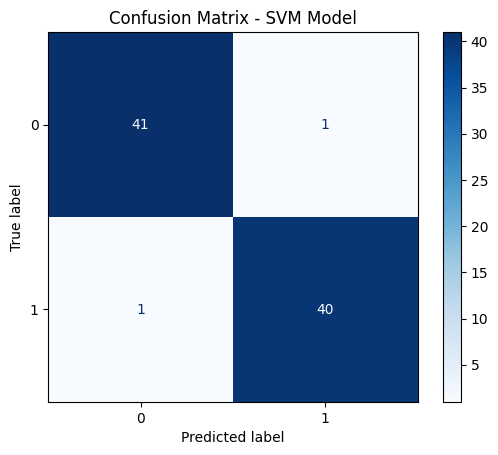

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

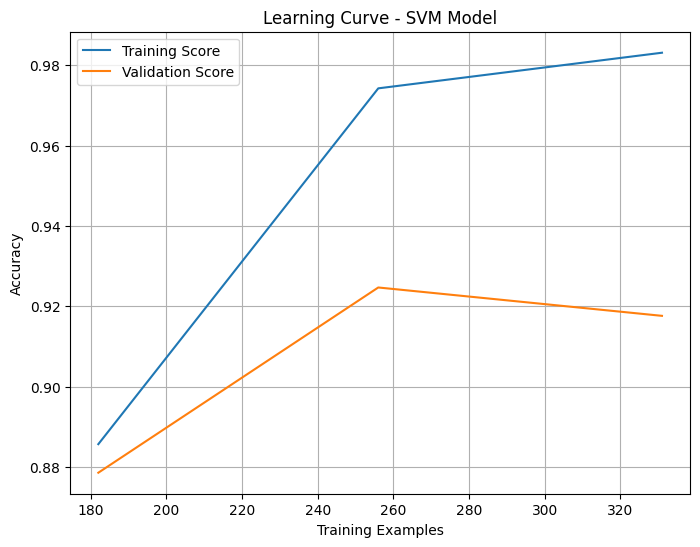

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load datasets
final_path = '/content/drive/My Drive/8featuresdata/final_combined_data_ver2.csv'
annotations_path = '/content/drive/My Drive/breast_cancer_annotations/breast_cancer_annotations.csv'
data_cleaned = pd.read_csv(final_path)
annotations = pd.read_csv(annotations_path)

# Merge datasets
data_combined = pd.concat([data_cleaned, annotations[['Density', 'Lesion_Type', 'X_Center', 'Y_Center', 'Radius']]], axis=1)

# Encode categorical variables
data_combined['Label'] = pd.Categorical(data_combined['Label']).codes  # Encode target labels
data_combined['Density'] = pd.Categorical(data_combined['Density']).codes  # Encode Density
data_combined = pd.get_dummies(data_combined, columns=['Lesion_Type'], drop_first=True)  # One-hot encode Lesion_Type

# Separate numeric and non-numeric columns
numeric_columns = data_combined.select_dtypes(include=[np.number]).columns
non_numeric_columns = data_combined.select_dtypes(exclude=[np.number]).columns

# Impute only numeric data
X_combined_numeric = data_combined[numeric_columns].drop(columns=['Label']).values  # Drop target column for features
imputer = SimpleImputer(strategy='mean')
X_imputed_numeric = imputer.fit_transform(X_combined_numeric)

# Standardize features
scaler_combined = StandardScaler()
X_scaled_numeric = scaler_combined.fit_transform(X_imputed_numeric)

# Update target variable (Label)
y_combined = data_combined['Label'].values  # Labels

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_scaled_numeric, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    loss = 1 - accuracy
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Loss: {loss * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Stratified K-Folds for cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train KNN Model
knn_params_combined = {'n_neighbors': range(1, 11)}
knn_grid_combined = GridSearchCV(KNeighborsClassifier(), knn_params_combined, cv=stratified_cv, n_jobs=-1, verbose=1)
knn_grid_combined.fit(X_train_combined, y_train_combined)
best_knn_combined = knn_grid_combined.best_estimator_

# Evaluate KNN
evaluate_model(best_knn_combined, X_test_combined, y_test_combined, "KNN Model")
plot_learning_curve(best_knn_combined, "KNN Model", X_scaled_numeric, y_combined)

# Train Logistic Regression
log_reg_params_combined = {'C': [0.1, 1, 10, 100]}
log_reg_grid_combined = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    log_reg_params_combined,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)
log_reg_grid_combined.fit(X_train_combined, y_train_combined)
best_log_reg_combined = log_reg_grid_combined.best_estimator_

# Evaluate Logistic Regression
evaluate_model(best_log_reg_combined, X_test_combined, y_test_combined, "Logistic Regression Model")
plot_learning_curve(best_log_reg_combined, "Logistic Regression Model", X_scaled_numeric, y_combined)

# Train Random Forest
rf_params_combined = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid_combined = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params_combined, cv=stratified_cv, n_jobs=-1, verbose=1)
rf_grid_combined.fit(X_train_combined, y_train_combined)
best_rf_combined = rf_grid_combined.best_estimator_

# Evaluate Random Forest
evaluate_model(best_rf_combined, X_test_combined, y_test_combined, "Random Forest Model")
plot_learning_curve(best_rf_combined, "Random Forest Model", X_scaled_numeric, y_combined)

# Train and evaluate SVM
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=stratified_cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_combined, y_train_combined)

best_svm = svm_grid.best_estimator_
evaluate_model(best_svm, X_test_combined, y_test_combined, "SVM Model")
plot_learning_curve(best_svm, "SVM Model", X_scaled_numeric, y_combined)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img_id               330 non-null    object 
 1   Density              330 non-null    object 
 2   Lesion_Type          330 non-null    object 
 3   X_Center             330 non-null    float64
 4   Y_Center             330 non-null    float64
 5   Radius               330 non-null    float64
 6   variance_equalized   330 non-null    float64
 7   variance_filtered    330 non-null    int64  
 8   variance_psd         330 non-null    float64
 9   variance_local       330 non-null    float64
 10  variance_frequency   330 non-null    int64  
 11  variance_noise       330 non-null    float64
 12  variance_horizontal  330 non-null    float64
 13  variance_vertical    330 non-null    float64
 14  Label                330 non-null    int64  
dtypes: float64(9), int64(3), o

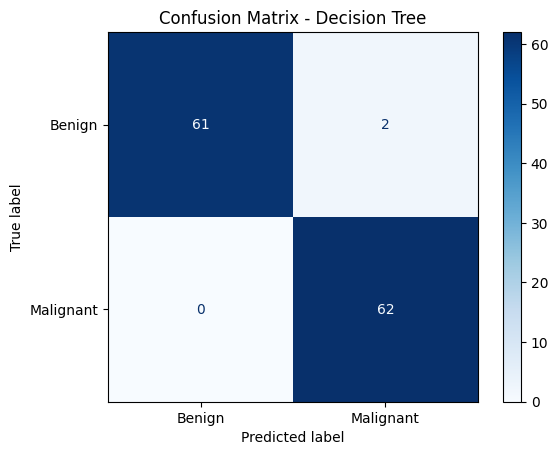

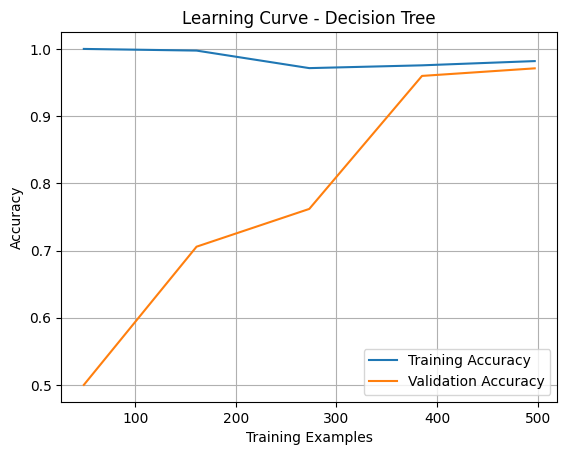


--- Training KNN ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.02      0.03        63
   Malignant       0.50      1.00      0.67        62

    accuracy                           0.50       125
   macro avg       0.75      0.51      0.35       125
weighted avg       0.75      0.50      0.35       125



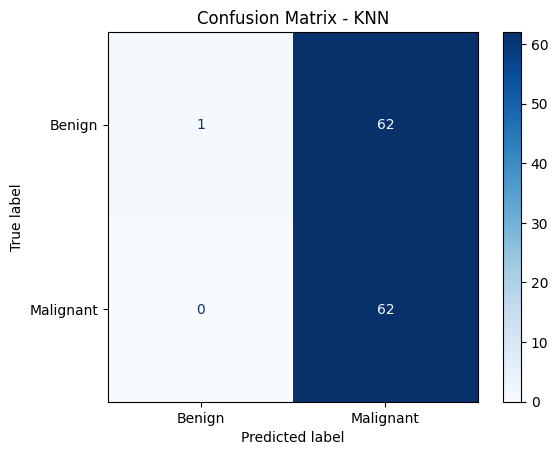

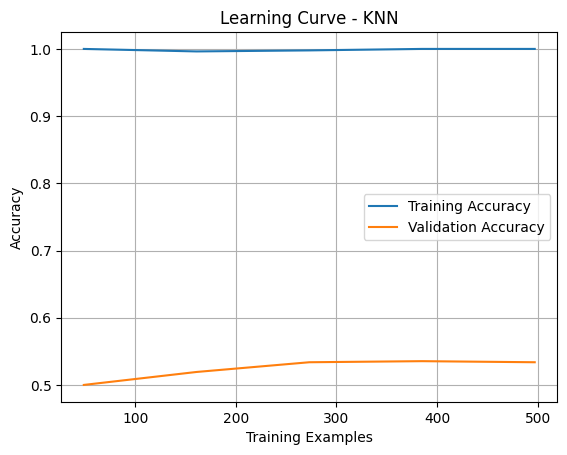


--- Training Logistic Regression ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        63
   Malignant       0.98      1.00      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



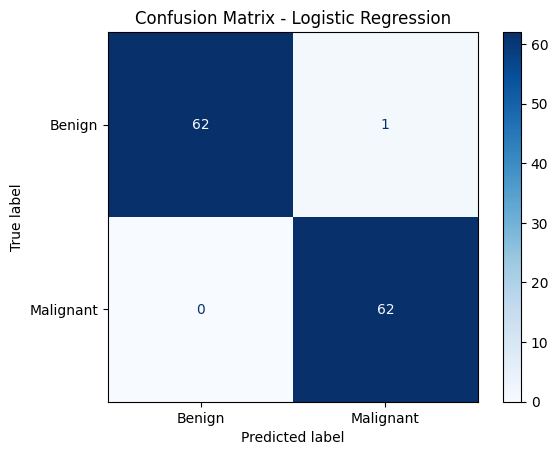

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

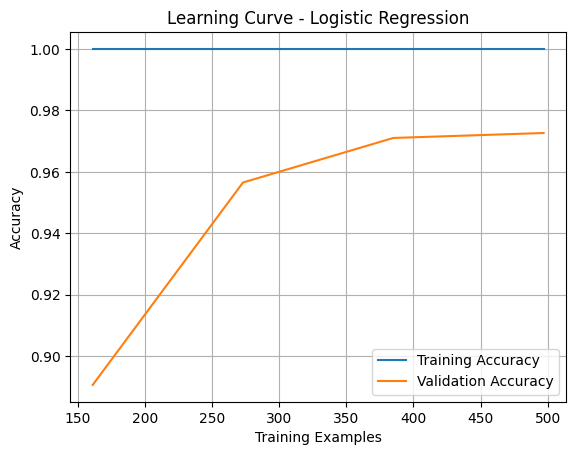


--- Training Random Forest ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        63
   Malignant       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



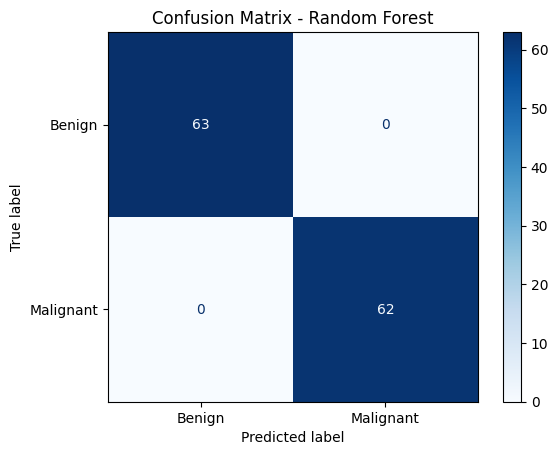

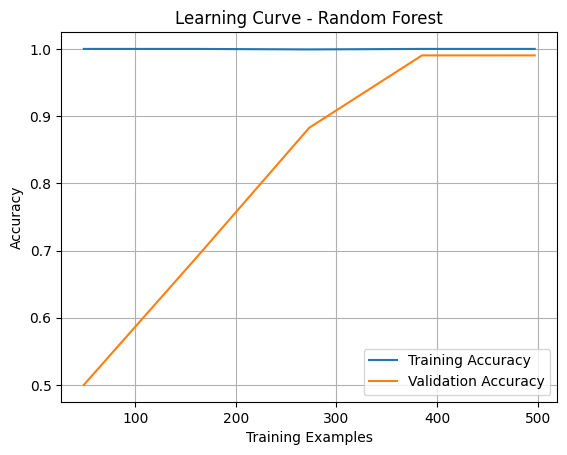


--- Training SVM ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVM Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        63
   Malignant       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



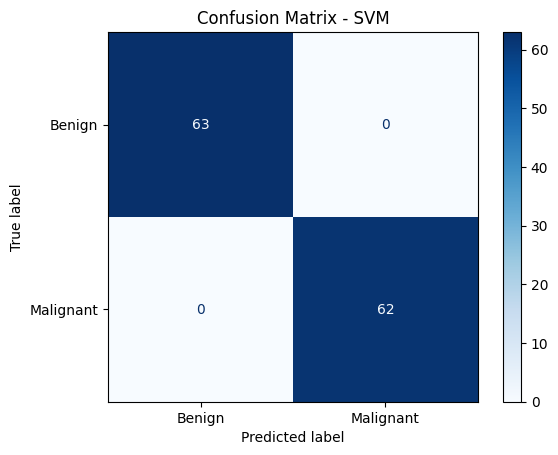

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

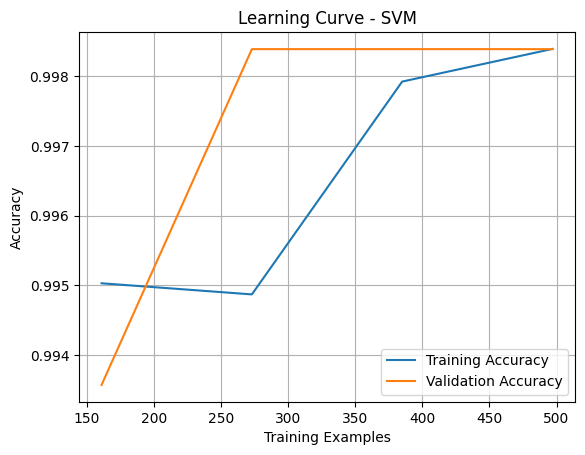

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # Handle imbalanced data
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/content/drive/My Drive/8featuresdata/15_data.csv'
data = pd.read_csv(file_path)

# Check dataset info
print("Dataset Info:")
print(data.info())

# Split numerical and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Handle missing values
# For numerical columns: use mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# For categorical columns: use most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical data if necessary
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

# Check class distribution
print("\nClass Distribution:")
print(y.value_counts())

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.legend(loc="best")
    plt.show()

# Dynamically detect unique labels in y_test
unique_labels = np.unique(y_test)
if len(unique_labels) == 2:
    target_names = ['Benign', 'Malignant']  # Binary classification
elif len(unique_labels) == 3:
    target_names = ['Normal', 'Benign', 'Malignant']  # Multi-class classification

# Train and evaluate models

# 1. Decision Tree Classifier
print("\n--- Training Decision Tree ---")
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=cv, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Evaluate Decision Tree
y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Plot learning curve for Decision Tree
plot_learning_curve(best_dt, "Learning Curve - Decision Tree", X, y, cv)

# 2. KNN
print("\n--- Training KNN ---")
knn_params = {'n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Evaluate KNN
y_pred_knn = best_knn.predict(X_test)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

# Plot learning curve for KNN
plot_learning_curve(best_knn, "Learning Curve - KNN", X, y, cv)

# 3. Logistic Regression
print("\n--- Training Logistic Regression ---")
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
                            log_reg_params, cv=cv, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot learning curve for Logistic Regression
plot_learning_curve(best_log_reg, "Learning Curve - Logistic Regression", X, y, cv)

# 4. Random Forest
print("\n--- Training Random Forest ---")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X, y, cv)

# 5. SVM
print("\n--- Training SVM ---")
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Evaluate SVM
y_pred_svm = best_svm.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

# Plot learning curve for SVM
plot_learning_curve(best_svm, "Learning Curve - SVM", X, y, cv)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img_id               330 non-null    object 
 1   Density              330 non-null    object 
 2   Lesion_Type          330 non-null    object 
 3   X_Center             330 non-null    float64
 4   Y_Center             330 non-null    float64
 5   Radius               330 non-null    float64
 6   variance_equalized   330 non-null    float64
 7   variance_filtered    330 non-null    int64  
 8   variance_psd         330 non-null    float64
 9   variance_local       330 non-null    float64
 10  variance_frequency   330 non-null    int64  
 11  variance_noise       330 non-null    float64
 12  variance_horizontal  330 non-null    float64
 13  variance_vertical    330 non-null    float64
 14  Label                330 non-null    int64  
dtypes: float64(9), int64(3), o

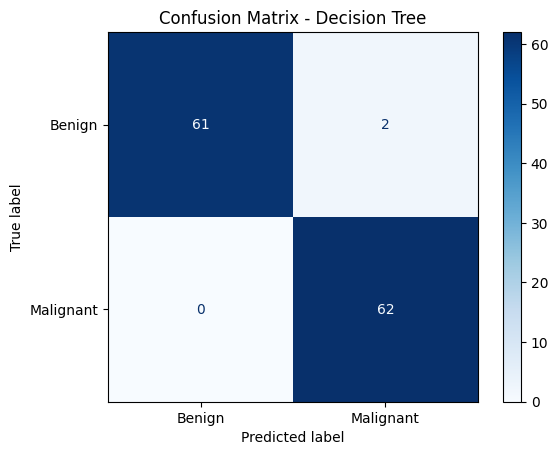

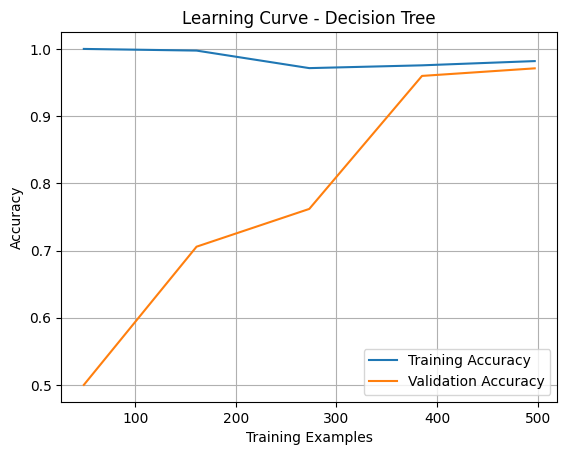


--- Training KNN ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.02      0.03        63
   Malignant       0.50      1.00      0.67        62

    accuracy                           0.50       125
   macro avg       0.75      0.51      0.35       125
weighted avg       0.75      0.50      0.35       125



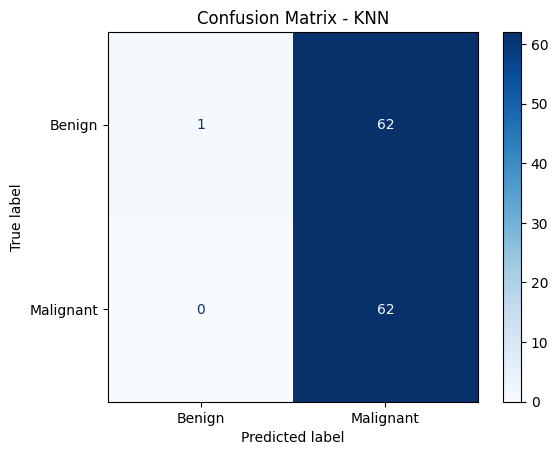

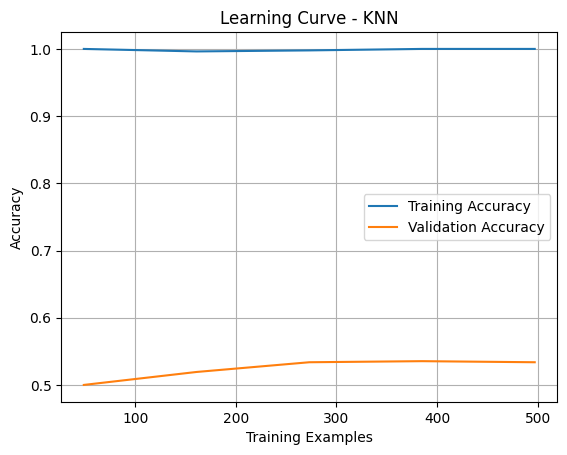


--- Training Logistic Regression ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        63
   Malignant       0.98      1.00      0.99        62

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



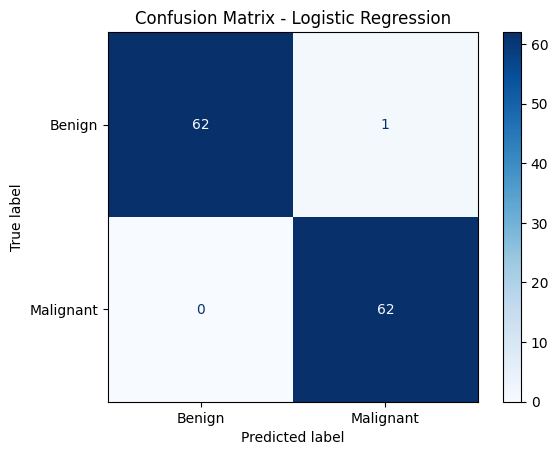

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

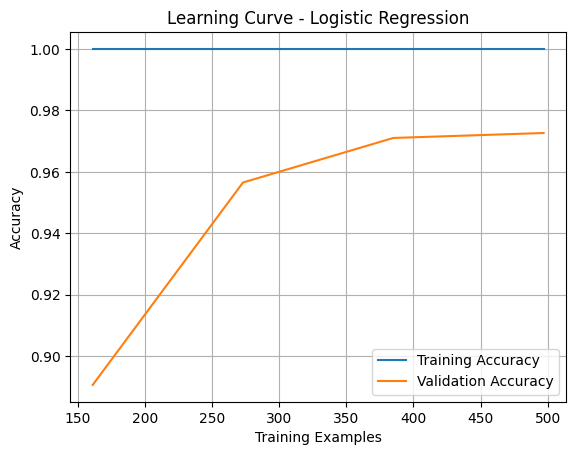


--- Training Random Forest ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        63
   Malignant       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



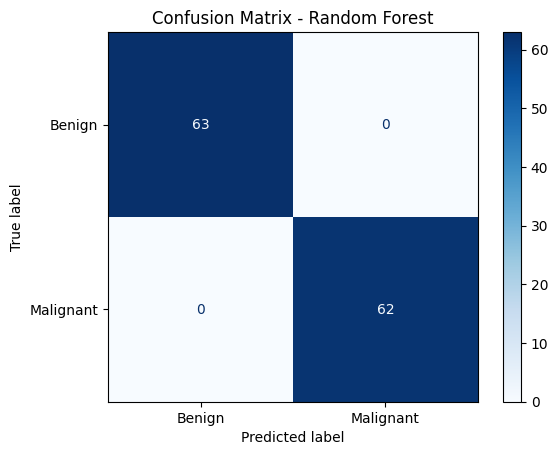

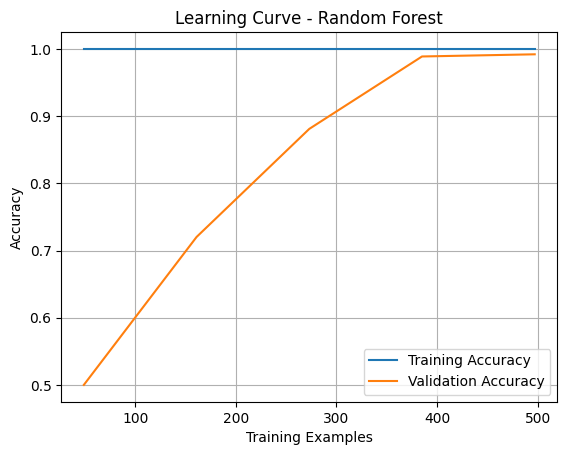


--- Training SVM ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits

SVM Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        63
   Malignant       1.00      1.00      1.00        62

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



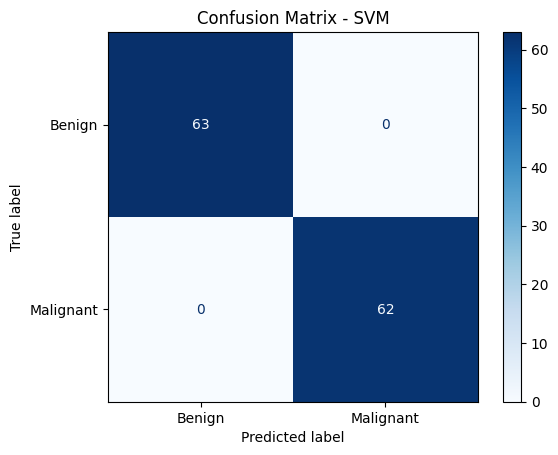

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

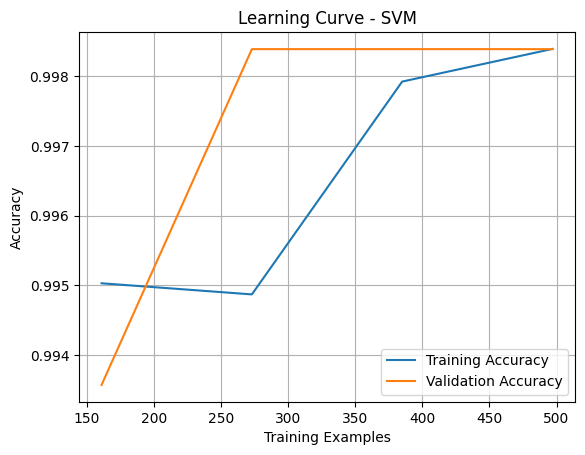

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # Handle imbalanced data
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/content/drive/My Drive/8featuresdata/15_data.csv'
data = pd.read_csv(file_path)

# Check dataset info
print("Dataset Info:")
print(data.info())

# Split numerical and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Handle missing values
# For numerical columns: use mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# For categorical columns: use most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical data if necessary
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

# Check class distribution
print("\nClass Distribution:")
print(y.value_counts())

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.legend(loc="best")
    plt.show()

# Dynamically detect unique labels in y_test
unique_labels = np.unique(y_test)
if len(unique_labels) == 2:
    target_names = ['Benign', 'Malignant']  # Binary classification
elif len(unique_labels) == 3:
    target_names = ['Normal', 'Benign', 'Malignant']  # Multi-class classification

# Train and evaluate models

# 1. Decision Tree Classifier
print("\n--- Training Decision Tree ---")
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=cv, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Evaluate Decision Tree
y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Plot learning curve for Decision Tree
plot_learning_curve(best_dt, "Learning Curve - Decision Tree", X, y, cv)

# 2. KNN
print("\n--- Training KNN ---")
knn_params = {'n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Evaluate KNN
y_pred_knn = best_knn.predict(X_test)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

# Plot learning curve for KNN
plot_learning_curve(best_knn, "Learning Curve - KNN", X, y, cv)

# 3. Logistic Regression
print("\n--- Training Logistic Regression ---")
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
                            log_reg_params, cv=cv, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot learning curve for Logistic Regression
plot_learning_curve(best_log_reg, "Learning Curve - Logistic Regression", X, y, cv)

# 4. Random Forest
print("\n--- Training Random Forest ---")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X, y, cv)

# 5. SVM
print("\n--- Training SVM ---")
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Evaluate SVM
y_pred_svm = best_svm.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, labels=unique_labels, target_names=target_names[:len(unique_labels)]))
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=unique_labels)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names[:len(unique_labels)]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

# Plot learning curve for SVM
plot_learning_curve(best_svm, "Learning Curve - SVM", X, y, cv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img_id               330 non-null    object 
 1   Density              330 non-null    object 
 2   Lesion_Type          330 non-null    object 
 3   X_Center             330 non-null    float64
 4   Y_Center             330 non-null    float64
 5   Radius               330 non-null    float64
 6   variance_equalized   330 non-null    float64
 7   variance_filtered    330 non-null    int64  
 8   variance_psd         330 non-null    float64
 9   variance_local       330 non-null    float64
 10  variance_frequency   330 non-null    int64  
 11  variance_noise       330 non-null    float64
 12  variance_horizontal  330 non-null    float64
 1

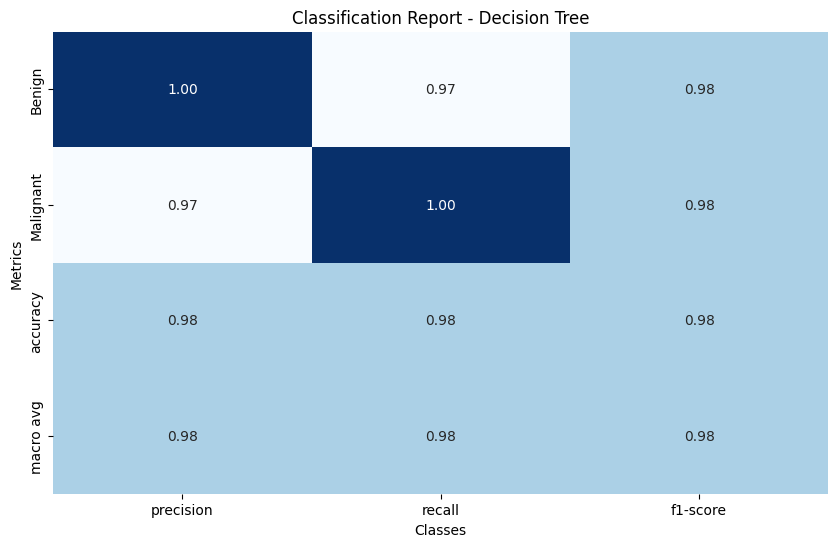

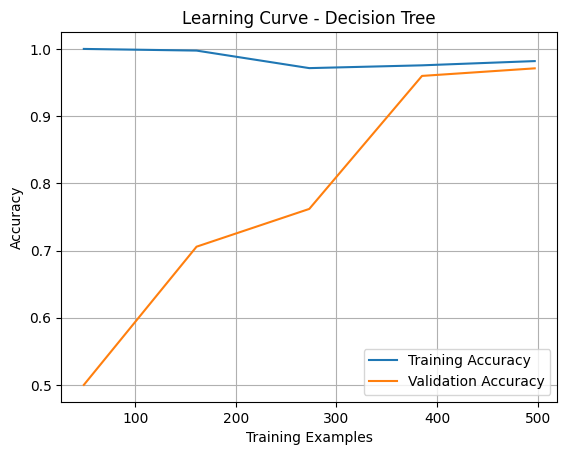


--- Training KNN ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


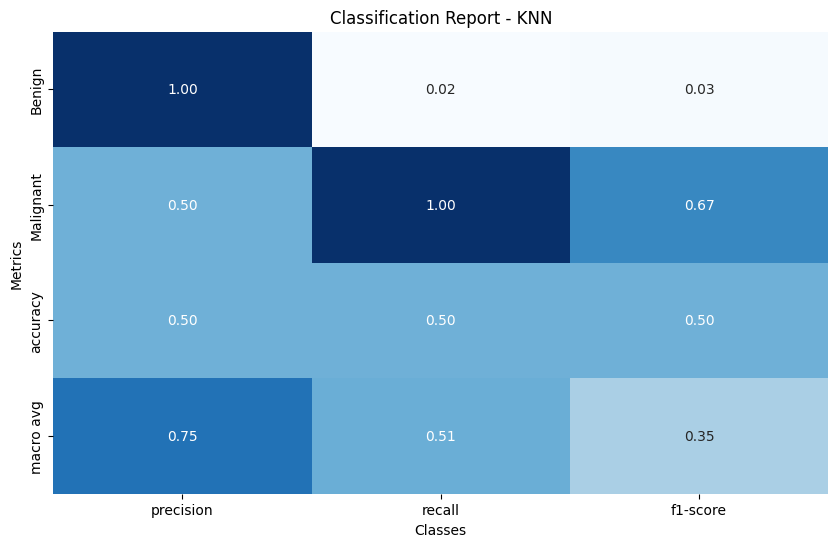

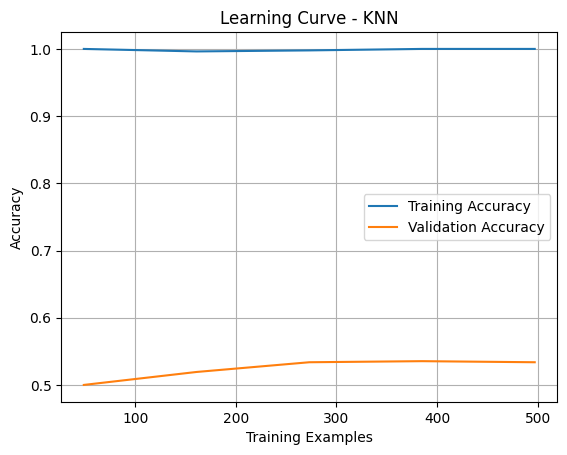


--- Training Logistic Regression ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits


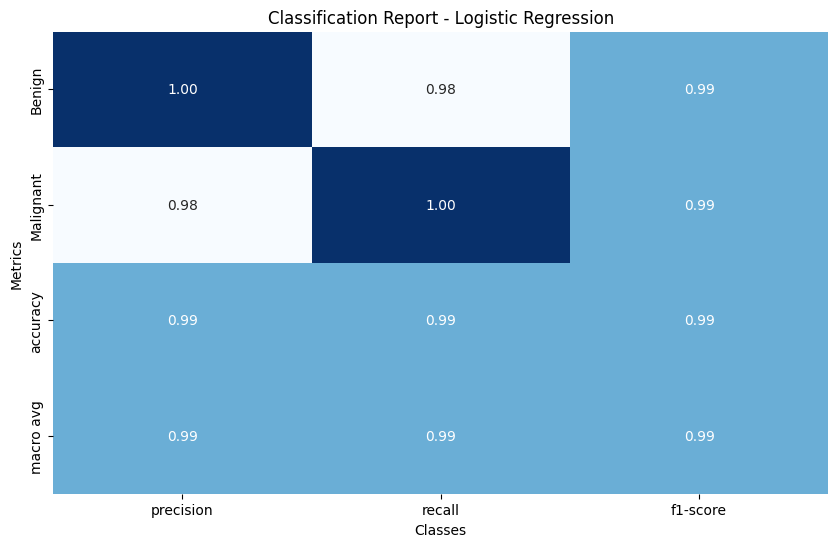

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

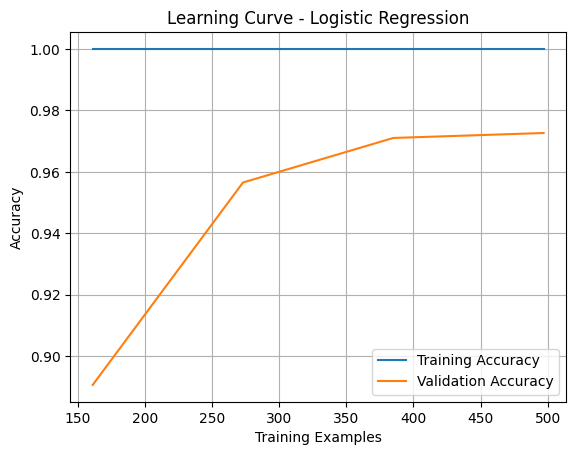


--- Training Random Forest ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits


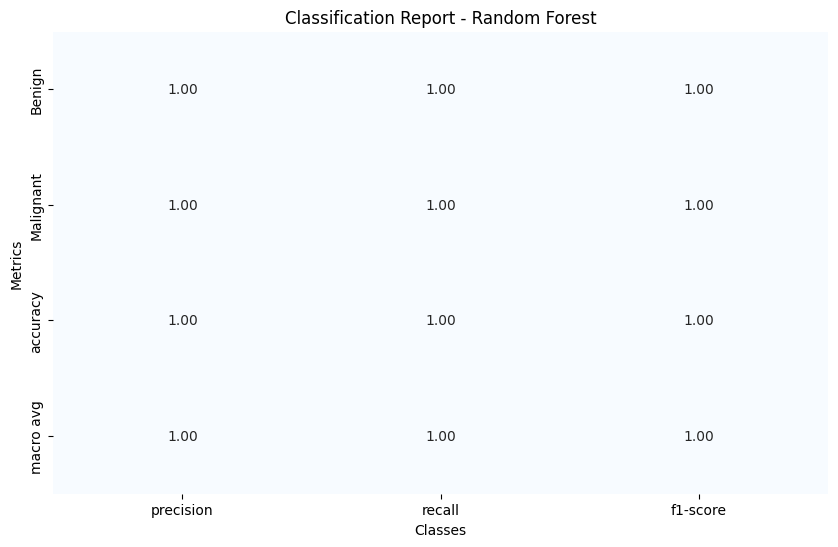

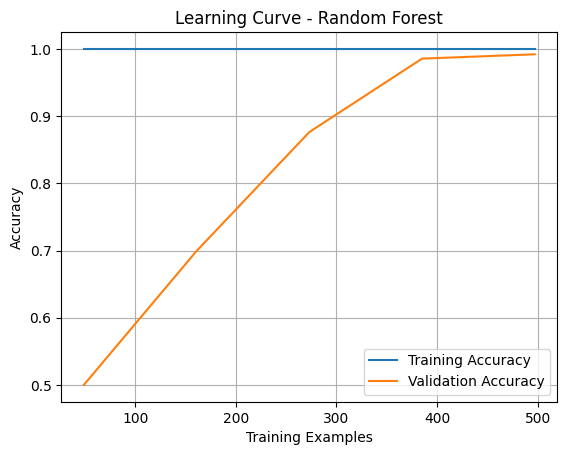


--- Training SVM ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits


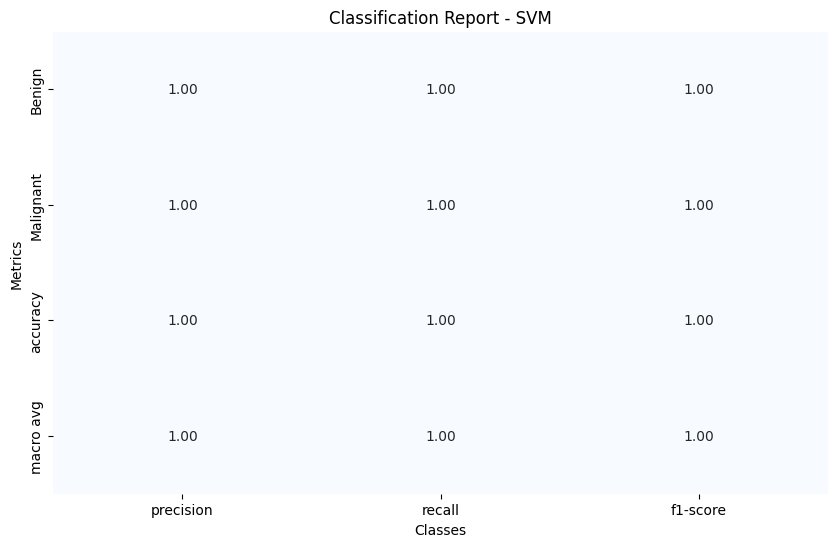

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

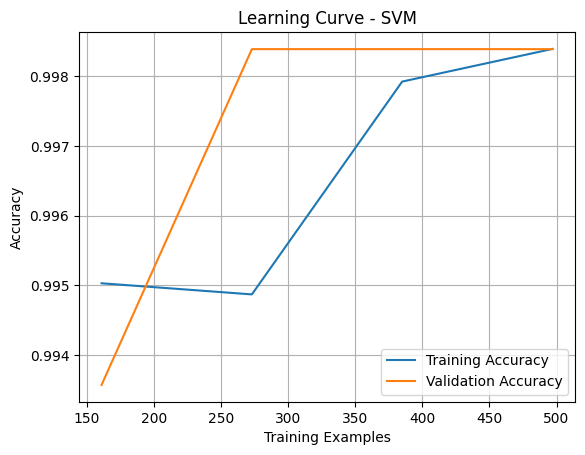

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import drive
from joblib import dump  # For saving models
from imblearn.over_sampling import SMOTE  # Handle imbalanced data
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
file_path = '/content/drive/My Drive/8featuresdata/15_data.csv'
data = pd.read_csv(file_path)

# Check dataset info
print("Dataset Info:")
print(data.info())

# Split numerical and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Handle missing values
# For numerical columns: use mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# For categorical columns: use most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical data if necessary
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

# Check class distribution
print("\nClass Distribution:")
print(y.value_counts())

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.legend(loc="best")
    plt.show()

# Function to convert classification report to DataFrame
def classification_report_to_dataframe(y_true, y_pred, labels, target_names):
    report_dict = classification_report(y_true, y_pred, labels=labels, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df = report_df.round(2)  # Round values for better readability
    return report_df

# Function to plot classification report heatmap
def plot_classification_report_heatmap(report_df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
    plt.title(title)
    plt.ylabel("Metrics")
    plt.xlabel("Classes")
    plt.show()

# Dynamically detect unique labels in y_test
unique_labels = np.unique(y_test)
if len(unique_labels) == 2:
    target_names = ['Benign', 'Malignant']  # Binary classification
elif len(unique_labels) == 3:
    target_names = ['Normal', 'Benign', 'Malignant']  # Multi-class classification

# Train and evaluate models

# 1. Decision Tree Classifier
print("\n--- Training Decision Tree ---")

# Define path to save the model
model_path = '/content/drive/My Drive/decision_tree_model.joblib'

# GridSearchCV to find best parameters
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=cv, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Save the Decision Tree model
dump(best_dt, model_path)
print(f"Decision Tree model saved successfully to {model_path}")

# Evaluate Decision Tree
y_pred_dt = best_dt.predict(X_test)

# Convert classification report to DataFrame and plot heatmap
dt_report_df = classification_report_to_dataframe(y_test, y_pred_dt, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(dt_report_df, "Classification Report - Decision Tree")

# Plot Learning Curve
plot_learning_curve(best_dt, "Learning Curve - Decision Tree", X, y, cv)

# 2. KNN
print("\n--- Training KNN ---")
knn_params = {'n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Evaluate KNN
y_pred_knn = best_knn.predict(X_test)
knn_report_df = classification_report_to_dataframe(y_test, y_pred_knn, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(knn_report_df, "Classification Report - KNN")
plot_learning_curve(best_knn, "Learning Curve - KNN", X, y, cv)

# 3. Logistic Regression
print("\n--- Training Logistic Regression ---")
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
                            log_reg_params, cv=cv, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
log_reg_report_df = classification_report_to_dataframe(y_test, y_pred_log_reg, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(log_reg_report_df, "Classification Report - Logistic Regression")
plot_learning_curve(best_log_reg, "Learning Curve - Logistic Regression", X, y, cv)

# 4. Random Forest
print("\n--- Training Random Forest ---")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
rf_report_df = classification_report_to_dataframe(y_test, y_pred_rf, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(rf_report_df, "Classification Report - Random Forest")
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X, y, cv)

# 5. SVM
print("\n--- Training SVM ---")
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Evaluate SVM
y_pred_svm = best_svm.predict(X_test)
svm_report_df = classification_report_to_dataframe(y_test, y_pred_svm, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(svm_report_df, "Classification Report - SVM")
plot_learning_curve(best_svm, "Learning Curve - SVM", X, y, cv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   img_id               330 non-null    object 
 1   Density              330 non-null    object 
 2   Lesion_Type          330 non-null    object 
 3   X_Center             330 non-null    float64
 4   Y_Center             330 non-null    float64
 5   Radius               330 non-null    float64
 6   variance_equalized   330 non-null    float64
 7   variance_filtered    330 non-null    int64  
 8   variance_psd         330 non-null    float64
 9   variance_local       330 non-null    float64
 10  variance_frequency   330 non-null    int64  
 11  variance_noise       330 non-null    float64
 12  variance_horizontal  330 non-null    float64
 1

<Figure size 800x600 with 0 Axes>

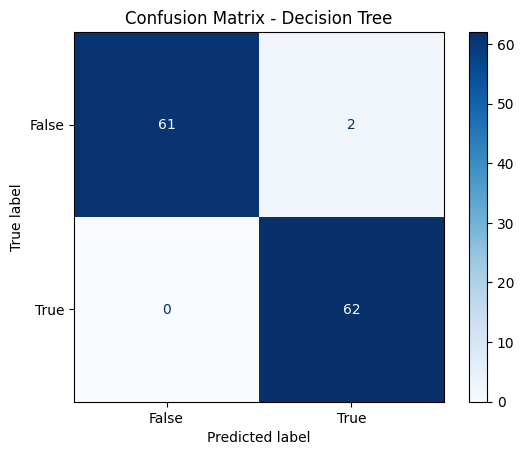

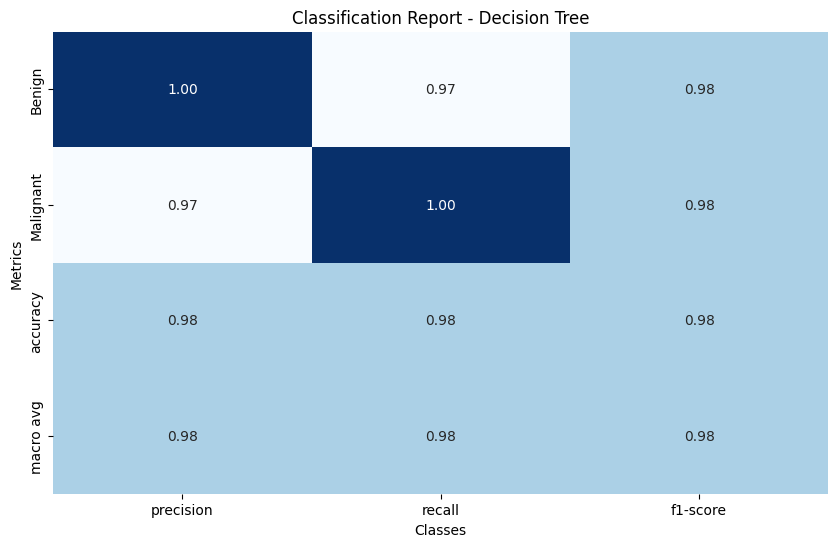

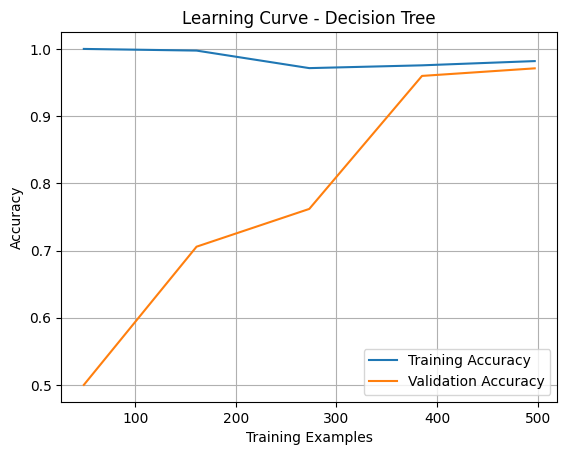


--- Training KNN ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 800x600 with 0 Axes>

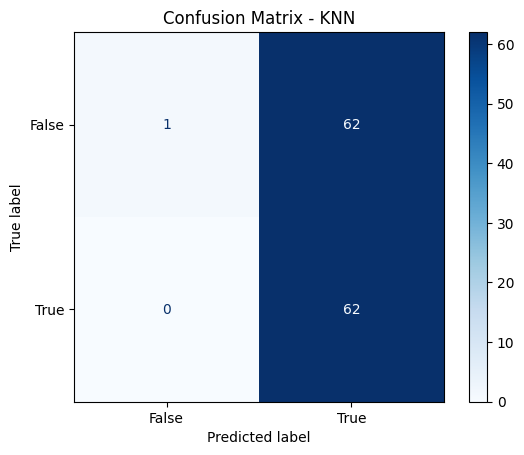

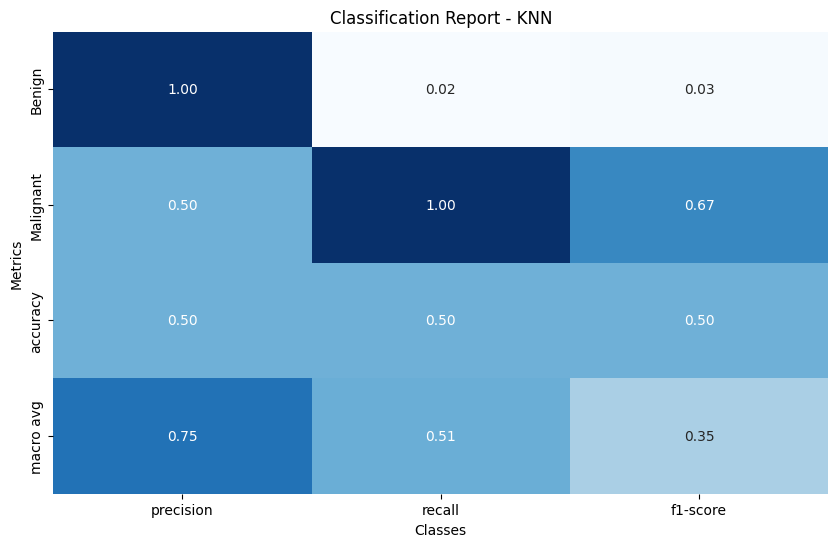

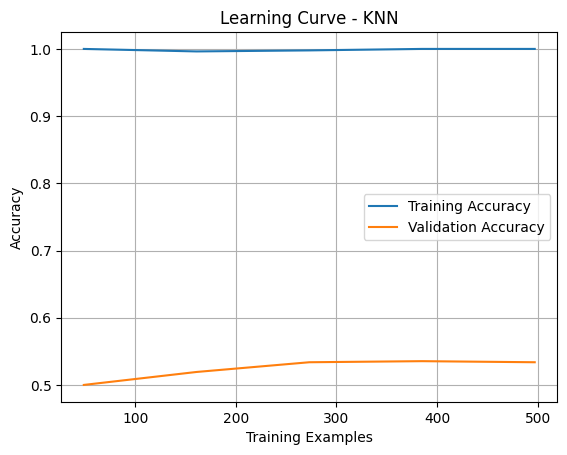


--- Training Logistic Regression ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits


<Figure size 800x600 with 0 Axes>

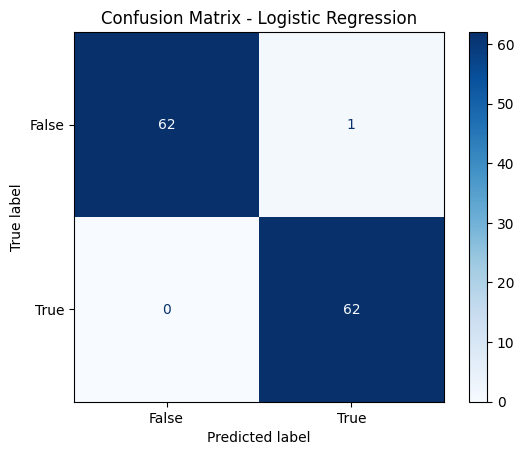

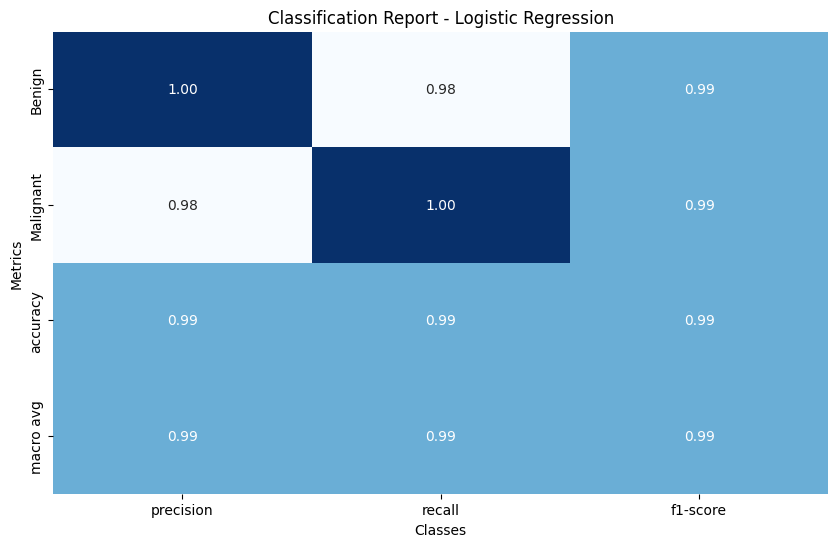

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/l

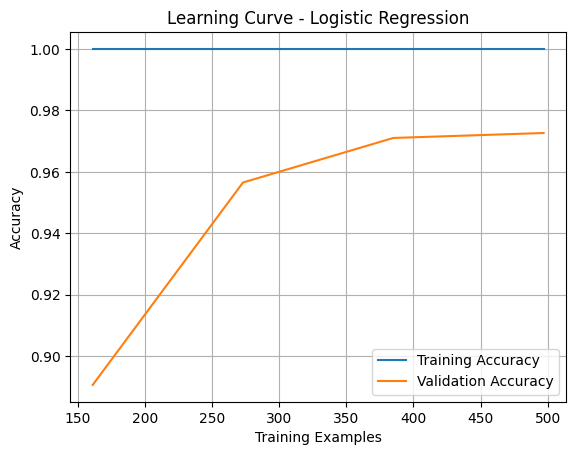


--- Training Random Forest ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits


<Figure size 800x600 with 0 Axes>

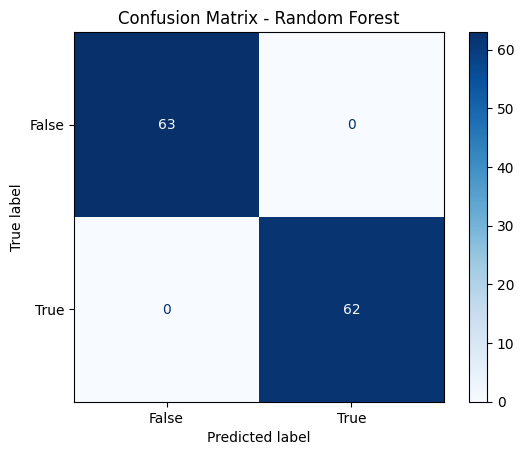

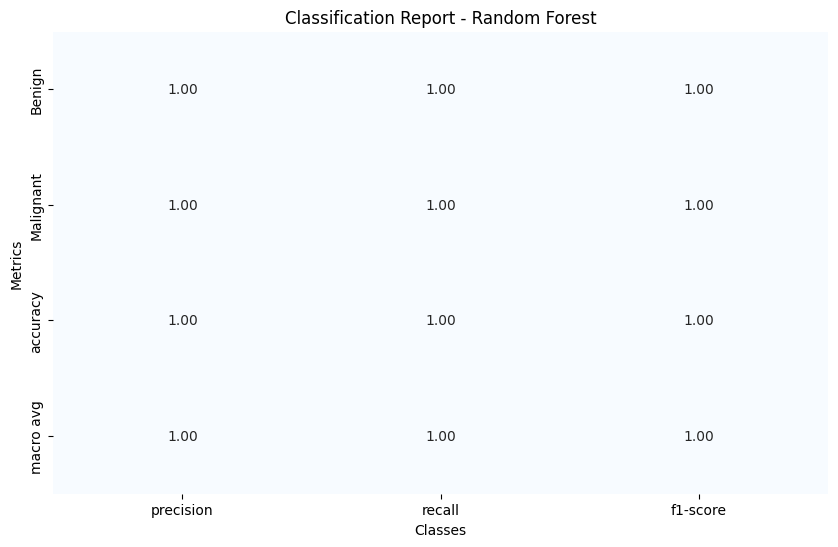

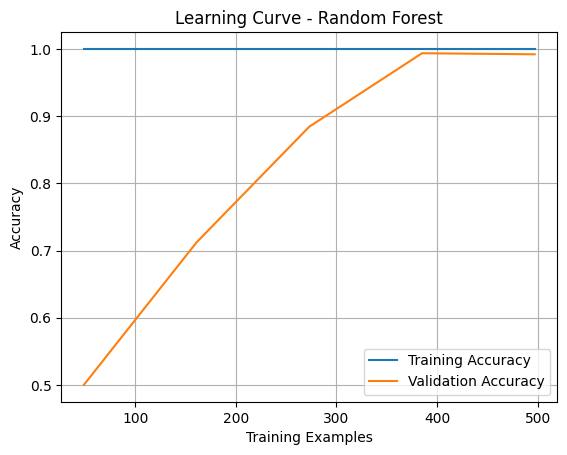


--- Training SVM ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits


<Figure size 800x600 with 0 Axes>

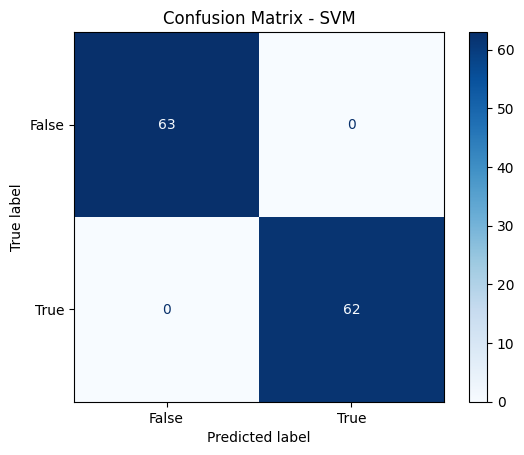

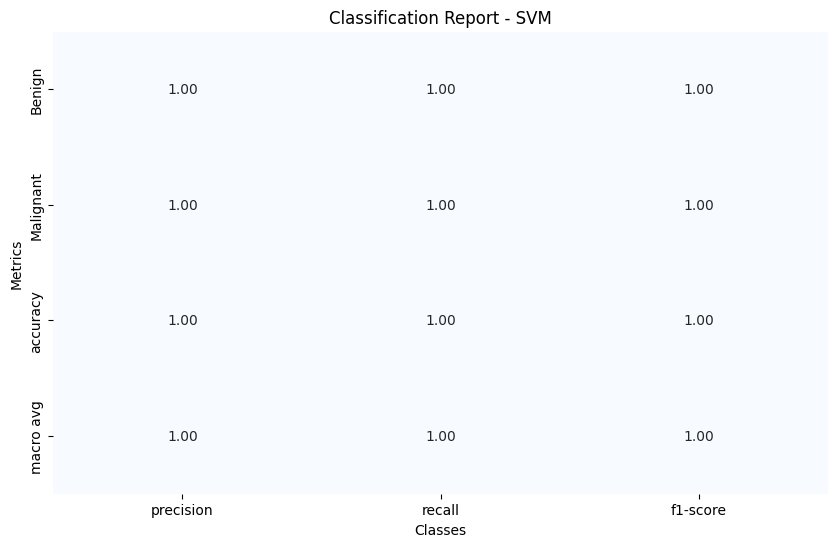

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/sv

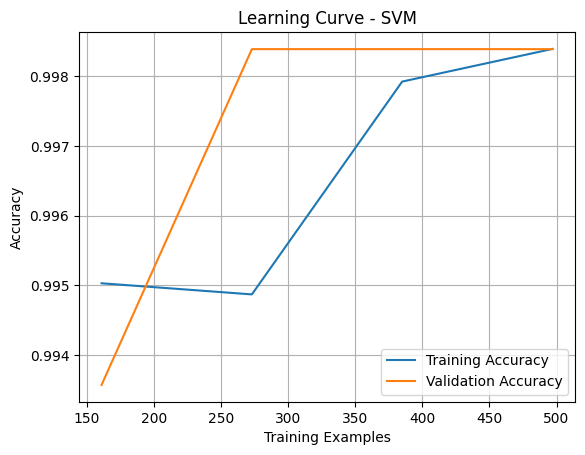

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import drive
from joblib import dump  # For saving models
from imblearn.over_sampling import SMOTE  # Handle imbalanced data
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
file_path = '/content/drive/My Drive/8featuresdata/15_data.csv'
data = pd.read_csv(file_path)

# Check dataset info
print("Dataset Info:")
print(data.info())

# Split numerical and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Handle missing values
# For numerical columns: use mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# For categorical columns: use most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Encode categorical data if necessary
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Labels

# Check class distribution
print("\nClass Distribution:")
print(y.value_counts())

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy")
    plt.legend(loc="best")
    plt.show()

# Function to convert classification report to DataFrame
def classification_report_to_dataframe(y_true, y_pred, labels, target_names):
    report_dict = classification_report(y_true, y_pred, labels=labels, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df = report_df.round(2)  # Round values for better readability
    return report_df

# Function to plot classification report heatmap
def plot_classification_report_heatmap(report_df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
    plt.title(title)
    plt.ylabel("Metrics")
    plt.xlabel("Classes")
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

# Dynamically detect unique labels in y_test
unique_labels = np.unique(y_test)
if len(unique_labels) == 2:
    target_names = ['Benign', 'Malignant']  # Binary classification
elif len(unique_labels) == 3:
    target_names = ['Normal', 'Benign', 'Malignant']  # Multi-class classification

# Train and evaluate models

# 1. Decision Tree Classifier
print("\n--- Training Decision Tree ---")
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=cv, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
model_path = '/content/drive/My Drive/decision_tree_model1.joblib'
dump(best_dt, model_path)
print(f"Decision Tree model saved to {model_path}")

y_pred_dt = best_dt.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt, unique_labels, "Confusion Matrix - Decision Tree")
dt_report_df = classification_report_to_dataframe(y_test, y_pred_dt, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(dt_report_df, "Classification Report - Decision Tree")
plot_learning_curve(best_dt, "Learning Curve - Decision Tree", X, y, cv)

# 2. KNN
print("\n--- Training KNN ---")
knn_params = {'n_neighbors': range(1, 11)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, unique_labels, "Confusion Matrix - KNN")
knn_report_df = classification_report_to_dataframe(y_test, y_pred_knn, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(knn_report_df, "Classification Report - KNN")
plot_learning_curve(best_knn, "Learning Curve - KNN", X, y, cv)

# 3. Logistic Regression
print("\n--- Training Logistic Regression ---")
log_reg_params = {'C': [0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'), log_reg_params, cv=cv, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
plot_confusion_matrix(y_test, y_pred_log_reg, unique_labels, "Confusion Matrix - Logistic Regression")
log_reg_report_df = classification_report_to_dataframe(y_test, y_pred_log_reg, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(log_reg_report_df, "Classification Report - Logistic Regression")
plot_learning_curve(best_log_reg, "Learning Curve - Logistic Regression", X, y, cv)

# 4. Random Forest
print("\n--- Training Random Forest ---")
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, unique_labels, "Confusion Matrix - Random Forest")
rf_report_df = classification_report_to_dataframe(y_test, y_pred_rf, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(rf_report_df, "Classification Report - Random Forest")
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X, y, cv)

# 5. SVM
print("\n--- Training SVM ---")
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(class_weight='balanced'), svm_params, cv=cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, unique_labels, "Confusion Matrix - SVM")
svm_report_df = classification_report_to_dataframe(y_test, y_pred_svm, unique_labels, target_names[:len(unique_labels)])
plot_classification_report_heatmap(svm_report_df, "Classification Report - SVM")
plot_learning_curve(best_svm, "Learning Curve - SVM", X, y, cv)


In [ ]:
from google.colab import drive
import os
import cv2
import pandas as pd
import albumentations as A
from albumentations import KeypointParams

# Kết nối Google Drive
drive.mount('/content/drive')

# Đường dẫn thư mục ảnh và file CSV
image_folder = "/content/drive/MyDrive/images_processed/malignant_cases"
output_folder = "/content/drive/MyDrive/images_processed/test_albumation"
annotation_file = "/content/drive/MyDrive/breast_cancer_annotations/breast_cancer_annotations.csv"
output_annotation_file = "/content/drive/MyDrive/breast_cancer_annotations/augmented_annotations.csv"

# Đọc file CSV và đồng bộ tên ảnh
annotations = pd.read_csv(annotation_file)
annotations["Image_ID"] = annotations["Image_ID"].apply(lambda x: f"{x}.png")

# Định nghĩa augmentations
transform = A.Compose(
    [
        A.Rotate(limit=30, border_mode=cv2.BORDER_REFLECT),
        A.Resize(height=512, width=512),
    ],
    keypoint_params=A.KeypointParams(format='xy', remove_invisible=False)
)

# Tạo thư mục output nếu chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Tạo DataFrame để lưu tọa độ mới
augmented_annotations = []

augmentation_counter = 1


# Duyệt qua từng ảnh
for image_name, group in annotations.groupby("Image_ID"):
    image_path = os.path.join(image_folder, image_name)
    print(f"Đang xử lý: {image_path}")
    if not os.path.exists(image_path):
        print(f"Không tìm thấy ảnh {image_path}, bỏ qua.")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Lấy keypoints và bán kính từ group
    keypoints = [(row["X_Center"], row["Y_Center"]) for _, row in group.iterrows()]
    radii = [row["Radius"] for _, row in group.iterrows()]

    # Áp dụng augmentations
    augmented = transform(image=image, keypoints=keypoints)
    augmented_image = augmented["image"]
    augmented_keypoints = augmented["keypoints"]

    # Tạo tên file mới
    augmented_image_name = f"aug_{augmentation_counter}_{image_name}"  # Thêm tiền tố/hậu tố
    augmentation_counter += 1

    # Lưu ảnh đã biến đổi
    output_image_path = os.path.join(output_folder, augmented_image_name)
    cv2.imwrite(output_image_path, augmented_image)

    # Cập nhật tọa độ mới
    for (new_x, new_y), radius in zip(augmented_keypoints, radii):
        augmented_annotations.append({
            "Image_ID": augmented_image_name,  # Lưu tên mới trong annotation
            "X_Center": new_x,
            "Y_Center": new_y,
            "Radius": radius
        })

# Lưu tọa độ mới vào file CSV
augmented_df = pd.DataFrame(augmented_annotations)
augmented_df.to_csv(output_annotation_file, index=False)

print("Tăng cường dữ liệu hoàn tất!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Đang xử lý: /content/drive/MyDrive/images_processed/malignant_cases/mdb001.png
Không tìm thấy ảnh /content/drive/MyDrive/images_processed/malignant_cases/mdb001.png, bỏ qua.
Đang xử lý: /content/drive/MyDrive/images_processed/malignant_cases/mdb002.png
Không tìm thấy ảnh /content/drive/MyDrive/images_processed/malignant_cases/mdb002.png, bỏ qua.
Đang xử lý: /content/drive/MyDrive/images_processed/malignant_cases/mdb003.png
Không tìm thấy ảnh /content/drive/MyDrive/images_processed/malignant_cases/mdb003.png, bỏ qua.
Đang xử lý: /content/drive/MyDrive/images_processed/malignant_cases/mdb004.png
Không tìm thấy ảnh /content/drive/MyDrive/images_processed/malignant_cases/mdb004.png, bỏ qua.
Đang xử lý: /content/drive/MyDrive/images_processed/malignant_cases/mdb005.png
Không tìm thấy ảnh /content/drive/MyDrive/images_processed/malignant_cases/mdb005.png, bỏ qua.
Đ

In [ ]:
import cv2
import numpy as np
import os

def resize_and_crop(image_folder, output_folder):
    """
    Resize grayscale medical images to 512x512 and crop black borders, focusing on the chest region.

    Parameters:
        image_folder (str): Path to the folder containing input images.
        output_folder (str): Path to save the processed images.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        output_path = os.path.join(output_folder, image_name)

        # Load the grayscale image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Cannot read the image {image_name}. Skipping.")
            continue

        # Resize the image to 512x512
        resized_image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_AREA)

        # Detect non-black regions (chest area)
        _, binary_mask = cv2.threshold(resized_image, 10, 255, cv2.THRESH_BINARY)
        x, y, w, h = cv2.boundingRect(binary_mask)

        # Crop the image to the detected region
        cropped_image = resized_image[y:y + h, x:x + w]

        # Optionally resize again to ensure the cropped image fits specific dimensions
        final_image = cv2.resize(cropped_image, (512, 512), interpolation=cv2.INTER_AREA)

        # Save the processed image
        cv2.imwrite(output_path, final_image)

        print(f"Processed image saved to {output_path}")

# Example usage
image_folder = "/content/drive/MyDrive/images_processed/benign_cases"
output_folder = "/content/drive/MyDrive/images_processed/resized"
resize_and_crop(image_folder, output_folder)

Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb015.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb010.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb002.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb005.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb013.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb001.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb019.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb017.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb012.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb063.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb030.png
Processed image saved to /content/drive/MyDrive/images_processed/resized/mdb

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive  # Import drive module

def load_image(image_path):
    """
    Load image as grayscale with error handling.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found or unable to load from {image_path}")
    return image

def crop_to_chest_region_advanced(image):
    """
    Crop the image to focus on the chest region using contour detection.
    """
    _, binary_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Find the largest contour (assume it corresponds to the chest region)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped_image = image[y:y + h, x:x + w]
        return cropped_image
    return image  # Return original image if no contours found

def histogram_equalization(image):
    """
    Apply histogram equalization to enhance contrast.
    """
    return cv2.equalizeHist(image)

def butterworth_highpass_filter(image, cutoff_frequency=30, order=2):
    """
    Apply Butterworth Highpass Filter in the frequency domain.
    """
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))

    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)
    dft_shifted_filtered = dft_shifted * mask[..., np.newaxis]
    dft_filtered = np.fft.ifftshift(dft_shifted_filtered)
    filtered_image = cv2.idft(dft_filtered)
    return cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

def compute_psd(image):
    """
    Compute Power Spectral Density (PSD) via FFT.
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    psd = np.abs(fshift) ** 2
    return psd

def local_variance(image, kernel_size=3):
    """
    Compute local variance of the image.
    """
    mean = cv2.blur(image, (kernel_size, kernel_size))
    sq_mean = cv2.blur(image ** 2, (kernel_size, kernel_size))
    variance = sq_mean - mean ** 2
    return np.var(variance)

def directional_variance(image):
    """
    Compute variance along horizontal and vertical directions.
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    variance_x = np.var(sobel_x)
    variance_y = np.var(sobel_y)
    return variance_x, variance_y

def frequency_domain_variance(image):
    """
    Compute variance in the frequency domain.
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return np.var(magnitude_spectrum)

def noise_variance(image):
    """
    Compute noise variance by subtracting median filter output from the original image.
    """
    median = cv2.medianBlur(image, 3)
    noise = image - median
    return np.var(noise)

def extract_variance_extended(image, cutoff_frequency=30, order=2):
    """
    Extract extended variance features from the image.
    """
    # Histogram Equalization
    equalized_image = histogram_equalization(image)

    # Butterworth Highpass Filter
    filtered_image = butterworth_highpass_filter(equalized_image, cutoff_frequency=cutoff_frequency, order=order)

    # PSD
    psd = compute_psd(filtered_image)

    # Calculate variance for original features
    variance_equalized = np.var(equalized_image)
    variance_filtered = np.var(filtered_image)
    variance_psd = np.var(psd)

    # Additional variances
    variance_local = local_variance(image)
    variance_freq = frequency_domain_variance(image)
    variance_noise = noise_variance(image)
    variance_x, variance_y = directional_variance(image)

    return (variance_equalized, variance_filtered, variance_psd,
            variance_local, variance_freq, variance_noise, variance_x, variance_y)

def create_feature_table_extended(image_paths, label):
    """
    Create a feature table with extended variances from image paths.
    """
    data = []
    for img_path in image_paths:
        print(f"Processing image: {img_path}")
        image_id = os.path.basename(img_path)

        # Load image with error handling
        try:
            image = load_image(img_path)
        except ValueError as e:
            print(f"Error loading image: {e}")
            continue

        # Preprocessing: Crop ROI and resize
        image = crop_to_chest_region_advanced(image)
        image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_AREA)

        # Extract variances
        variances = extract_variance_extended(image)
        (var_equalized, var_filtered, var_psd, var_local,
         var_freq, var_noise, var_x, var_y) = variances

        # Append data
        data.append({
            'img_id': image_id,
            'variance_equalized': var_equalized,
            'variance_filtered': var_filtered,
            'variance_psd': var_psd,
            'variance_local': var_local,
            'variance_frequency': var_freq,
            'variance_noise': var_noise,
            'variance_horizontal': var_x,
            'variance_vertical': var_y,
            'label': label
        })

    # Return DataFrame
    return pd.DataFrame(data)

# Example usage
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/images_processed/malignant_cases/'
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
label = 'malignant'
feature_table_extended = create_feature_table_extended(image_paths, label)
output_csv = '/content/drive/My Drive/variance_data_train/malignant_features_14.csv'
feature_table_extended.to_csv(output_csv, index=False)
print(feature_table_extended)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_1_mdb023.png


<ipython-input-22-fb05aee9ea1a>:47: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))


Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_2_mdb028.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_3_mdb058.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_4_mdb072.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_5_mdb075.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_6_mdb090.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_7_mdb092.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_8_mdb095.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_9_mdb102.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_10_mdb105.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug_11_mdb110.png
Processing image: /content/drive/My Drive/images_processed/malignant_cases/aug

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive  # Import drive module

def load_image(image_path):
    """
    Load image as grayscale with error handling.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found or unable to load from {image_path}")
    return image

def crop_to_chest_region_advanced(image):
    """
    Crop the image to focus on the chest region using contour detection.
    """
    _, binary_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Find the largest contour (assume it corresponds to the chest region)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped_image = image[y:y + h, x:x + w]
        return cropped_image
    return image  # Return original image if no contours found

def histogram_equalization(image):
    """
    Apply histogram equalization to enhance contrast.
    """
    return cv2.equalizeHist(image)

def butterworth_highpass_filter(image, cutoff_frequency=30, order=2):
    """
    Apply Butterworth Highpass Filter in the frequency domain.
    """
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))

    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)
    dft_shifted_filtered = dft_shifted * mask[..., np.newaxis]
    dft_filtered = np.fft.ifftshift(dft_shifted_filtered)
    filtered_image = cv2.idft(dft_filtered)
    return cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

def compute_psd(image):
    """
    Compute Power Spectral Density (PSD) via FFT.
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    psd = np.abs(fshift) ** 2
    return psd

def local_variance(image, kernel_size=3):
    """
    Compute local variance of the image.
    """
    mean = cv2.blur(image, (kernel_size, kernel_size))
    sq_mean = cv2.blur(image ** 2, (kernel_size, kernel_size))
    variance = sq_mean - mean ** 2
    return np.var(variance)

def directional_variance(image):
    """
    Compute variance along horizontal and vertical directions.
    """
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    variance_x = np.var(sobel_x)
    variance_y = np.var(sobel_y)
    return variance_x, variance_y

def frequency_domain_variance(image):
    """
    Compute variance in the frequency domain.
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return np.var(magnitude_spectrum)

def noise_variance(image):
    """
    Compute noise variance by subtracting median filter output from the original image.
    """
    median = cv2.medianBlur(image, 3)
    noise = image - median
    return np.var(noise)

def extract_variance_extended(image, cutoff_frequency=30, order=2):
    """
    Extract extended variance features from the image.
    """
    # Histogram Equalization
    equalized_image = histogram_equalization(image)

    # Butterworth Highpass Filter
    filtered_image = butterworth_highpass_filter(equalized_image, cutoff_frequency=cutoff_frequency, order=order)

    # PSD
    psd = compute_psd(filtered_image)

    # Calculate variance for original features
    variance_equalized = np.var(equalized_image)
    variance_filtered = np.var(filtered_image)
    variance_psd = np.var(psd)

    # Additional variances
    variance_local = local_variance(image)
    variance_freq = frequency_domain_variance(image)
    variance_noise = noise_variance(image)
    variance_x, variance_y = directional_variance(image)

    return (variance_equalized, variance_filtered, variance_psd,
            variance_local, variance_freq, variance_noise, variance_x, variance_y)

def create_feature_table_extended(image_paths, label):
    """
    Create a feature table with extended variances from image paths.
    """
    data = []
    for img_path in image_paths:
        print(f"Processing image: {img_path}")
        image_id = os.path.basename(img_path)

        # Load image with error handling
        try:
            image = load_image(img_path)
        except ValueError as e:
            print(f"Error loading image: {e}")
            continue

        # Preprocessing: Crop ROI and resize
        image = crop_to_chest_region_advanced(image)
        image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_AREA)

        # Extract variances
        variances = extract_variance_extended(image)
        (var_equalized, var_filtered, var_psd, var_local,
         var_freq, var_noise, var_x, var_y) = variances

        # Append data
        data.append({
            'img_id': image_id,
            'variance_equalized': var_equalized,
            'variance_filtered': var_filtered,
            'variance_psd': var_psd,
            'variance_local': var_local,
            'variance_frequency': var_freq,
            'variance_noise': var_noise,
            'variance_horizontal': var_x,
            'variance_vertical': var_y,
            'label': label
        })

    # Return DataFrame
    return pd.DataFrame(data)

# Example usage
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/images_processed/benign_cases/'
image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.png')]
label = 'malignant'
feature_table_extended = create_feature_table_extended(image_paths, label)
output_csv = '/content/drive/My Drive/variance_data_train/benign_features_14.csv'
feature_table_extended.to_csv(output_csv, index=False)
print(feature_table_extended)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_1_mdb001.png


<ipython-input-23-7e6c33ea5777>:47: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))


Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_2_mdb002.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_3_mdb005.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_4_mdb010.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_5_mdb012.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_6_mdb013.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_7_mdb015.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_8_mdb017.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_9_mdb019.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_10_mdb021.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_11_mdb025.png
Processing image: /content/drive/My Drive/images_processed/benign_cases/aug_12_mdb030.png
Processing image: 